!['평가 기준'](ref.png)

### EDA, 탐색적 데이터 분석

> 필요 라이브러리 import

In [3]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [4]:
os.chdir('C:/Users/mlosv/Downloads/23.08.22 데이터분석경진대회')

In [5]:
# CSV 파일 경로 지정
file_name = 'loan_customer.csv'

In [6]:
# CSV 파일 읽기
df = pd.read_csv(file_name)

In [7]:
# 컬럼 정보 미리 붙여 보기 (지주 제공 ppt참고)
column_info = {'SK_ID_CURR':'대출식별번호',
'NAME_CONTRACT_TYPE':'계약유형',
'CODE_GENDER':'성별',
'FLAG_OWN_REALTY':'자가부동산보유여부',
'CNT_CHILDREN':'자녀수',
'AMT_INCOME_TOTAL':'소득금액(USD)',
'AMT_CREDIT':'신용대출금액(USD)',
'NAME_INCOME_TYPE':'소득유형',
'NAME_EDUCATION_TYPE':'학력',
'NAME_FAMILY_STATUS':'결혼상태',
'NAME_HOUSING_TYPE':'주거형태',
'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구',
'DAYS_BIRTH':'대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
'DAYS_REGISTRATION':'대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
'DAYS_ID_PUBLISH':'대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
'FLAG_MOBIL':'휴대폰번호등록여부',
'FLAG_EMP_PHONE':'고용주연락처등록여부',
'FLAG_WORK_PHONE':'직장전화번호등록여부',
'FLAG_PHONE':'집전화번호등록여부',
'FLAG_EMAIL':'이메일주소등록여부',
'REGION_RATING_CLIENT':'거주지등급',
'WEEKDAY_APPR_PROCESS_START':'대출신청요일',
'HOUR_APPR_PROCESS_START':'대출신청시간대',
'REG_CITY_NOT_LIVE_CITY':'고객의등록지주소와실거주지일치여부',
'REG_CITY_NOT_WORK_CITY':'고객의등록지주소와직장주소일치여부',
'LIVE_CITY_NOT_WORK_CITY':'고객의실거주지와직장주소일치여부',
'ORGANIZATION_TYPE':'근무회사유형',
'FLAG_DOCUMENT_2':'문서2제공여부',
'FLAG_DOCUMENT_3':'문서3제공여부',
'FLAG_DOCUMENT_4':'문서4제공여부',
'CB_SCORE_1':'신용점수1',
'CB_SCORE_2':'신용점수2',
'CB_SCORE_3':'신용점수3',
'TARGET':'연체여부'}

In [8]:
# 컬럼 정보 수정 
df_v2 = df.copy() 

for col in df_v2.columns : 
    df_v2.rename(columns = {col:column_info[col]}, inplace = True)
    print(col+'컬럼의 이름을 '+column_info[col]+'로 수정했습니다 ')

SK_ID_CURR컬럼의 이름을 대출식별번호로 수정했습니다 
NAME_CONTRACT_TYPE컬럼의 이름을 계약유형로 수정했습니다 
CODE_GENDER컬럼의 이름을 성별로 수정했습니다 
FLAG_OWN_REALTY컬럼의 이름을 자가부동산보유여부로 수정했습니다 
CNT_CHILDREN컬럼의 이름을 자녀수로 수정했습니다 
AMT_INCOME_TOTAL컬럼의 이름을 소득금액(USD)로 수정했습니다 
AMT_CREDIT컬럼의 이름을 신용대출금액(USD)로 수정했습니다 
NAME_INCOME_TYPE컬럼의 이름을 소득유형로 수정했습니다 
NAME_EDUCATION_TYPE컬럼의 이름을 학력로 수정했습니다 
NAME_FAMILY_STATUS컬럼의 이름을 결혼상태로 수정했습니다 
NAME_HOUSING_TYPE컬럼의 이름을 주거형태로 수정했습니다 
REGION_POPULATION_RELATIVE컬럼의 이름을 거주지역의표준화된인구로 수정했습니다 
DAYS_BIRTH컬럼의 이름을 대출신청시점에서의일단위나이(기준시점대비상대적인시간)로 수정했습니다 
DAYS_EMPLOYED컬럼의 이름을 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_REGISTRATION컬럼의 이름을 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_ID_PUBLISH컬럼의 이름을 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
FLAG_MOBIL컬럼의 이름을 휴대폰번호등록여부로 수정했습니다 
FLAG_EMP_PHONE컬럼의 이름을 고용주연락처등록여부로 수정했습니다 
FLAG_WORK_PHONE컬럼의 이름을 직장전화번호등록여부로 수정했습니다 
FLAG_PHONE컬럼의 이름을 집전화번호등록여부로 수정했습니다 
FLAG_EMAIL컬럼의 이름을 이메일주소등록여부로 수정했습니다 
REGION_RATING_CLIENT컬럼의 이름을 거주지등급로 수정했습니다 
WEEKDAY_APPR_PROCESS_START

> 전체 데이터 구조 요약해서 보기

In [9]:
df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET
0,100002,Cash loans,M,Y,0,202500.0,NaN,Working,Secondary / secondary special,Single / not married,...,0,0,Business Entity Type 3,0,1,0,NaN,NaN,58.349224,1
1,100004,Revolving loans,NaN,NaN,0,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,...,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0
2,100020,Cash loans,M,N,0,108000.0,509602.5,Working,Secondary / secondary special,Married,...,1,0,Government,0,1,0,NaN,63.496369,NaN,0
3,100029,Cash loans,M,N,2,135000.0,NaN,Working,Secondary / secondary special,Married,...,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0
4,100048,Cash loans,NaN,Y,0,202500.0,604152.0,Working,Secondary / secondary special,Married,...,1,1,Industry: type 1,0,1,0,66.199985,NaN,NaN,0


*1.1 Check Point → 대출식별번호에 중복 없나*

In [10]:
# 대출식별 기준으로 그룹화하고 counting
grouped = df.groupby('SK_ID_CURR').size()

# counting이 1 넘어간 것들만 필터링
filtered_grouped = grouped[grouped > 1]

print(filtered_grouped)

Series([], dtype: int64)


*1.1 결과→ 대출일련번호가 unique key. 그럼 고객 구분은(고객:대출 = 1:n 관계)은 어떻게 하나?*

*1.2 Check Point → 수치/범주형 변수들 타입이 바르게 들어갔나 ?*

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 16906 non-null  object 
 3   FLAG_OWN_REALTY             14429 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  16700 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  16851 non-null  float64
 12  DAYS_BIRTH                  19251 non-null  float64
 13  DAYS_EMPLOYED               168

*1.2 결과→ 수치형 변수는 float/int, 범주형 변수는 object로 잘 들어가있음*

*1.3 Check Point → 결측값이 어떻게 들어가있는지 모르니, 결측치 유효값들 살펴보기 위해 value_coutns*

In [12]:
for column in df.columns:
    value_counts = df[column].value_counts(dropna = False)
    print(f"Value counts for {column} {column_info[column]}:\n{value_counts}\n")

Value counts for SK_ID_CURR 대출식별번호:
100002    1
337229    1
337317    1
337293    1
337288    1
         ..
218660    1
218625    1
218609    1
218594    1
456228    1
Name: SK_ID_CURR, Length: 24000, dtype: int64

Value counts for NAME_CONTRACT_TYPE 계약유형:
Cash loans         21733
Revolving loans     2267
Name: NAME_CONTRACT_TYPE, dtype: int64

Value counts for CODE_GENDER 성별:
F      11211
NaN     7094
M       5694
XNA        1
Name: CODE_GENDER, dtype: int64

Value counts for FLAG_OWN_REALTY 자가부동산보유여부:
Y      9939
NaN    9571
N      4490
Name: FLAG_OWN_REALTY, dtype: int64

Value counts for CNT_CHILDREN 자녀수:
0    16859
1     4703
2     2046
3      341
4       41
5        9
7        1
Name: CNT_CHILDREN, dtype: int64

Value counts for AMT_INCOME_TOTAL 소득금액(USD):
135000.0    2779
112500.0    2422
157500.0    2052
180000.0    1860
90000.0     1785
            ... 
68400.0        1
118800.0       1
183375.0       1
113008.5       1
120784.5       1
Name: AMT_INCOME_TOTAL, Length: 494, dty

> 결측치 종류 : 'NaN', 'nan', 'XNA', 'Unknown' ▶ np.nan로 통일 

In [13]:
adj_df = df.copy()

In [14]:
adj_df = adj_df.astype(str)
adj_df = adj_df.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

In [15]:
adj_df = adj_df.astype(df.dtypes)

In [16]:
for column in adj_df.columns:
    value_counts = adj_df[column].value_counts(dropna = False)
    print(f"Value counts for {column} {column_info[column]}:\n{value_counts}\n")

Value counts for SK_ID_CURR 대출식별번호:
100002    1
337229    1
337317    1
337293    1
337288    1
         ..
218660    1
218625    1
218609    1
218594    1
456228    1
Name: SK_ID_CURR, Length: 24000, dtype: int64

Value counts for NAME_CONTRACT_TYPE 계약유형:
Cash loans         21733
Revolving loans     2267
Name: NAME_CONTRACT_TYPE, dtype: int64

Value counts for CODE_GENDER 성별:
F      11211
NaN     7095
M       5694
Name: CODE_GENDER, dtype: int64

Value counts for FLAG_OWN_REALTY 자가부동산보유여부:
Y      9939
NaN    9571
N      4490
Name: FLAG_OWN_REALTY, dtype: int64

Value counts for CNT_CHILDREN 자녀수:
0    16859
1     4703
2     2046
3      341
4       41
5        9
7        1
Name: CNT_CHILDREN, dtype: int64

Value counts for AMT_INCOME_TOTAL 소득금액(USD):
135000.0    2779
112500.0    2422
157500.0    2052
180000.0    1860
90000.0     1785
            ... 
68400.0        1
118800.0       1
183375.0       1
113008.5       1
120784.5       1
Name: AMT_INCOME_TOTAL, Length: 494, dtype: int64

Va

*1.3 결과 → 결측치 표기 np.nan로 통일*

*1.4 Check Point → 범주형 변수들(object객체)의 유효값 체크*

In [17]:
# object 타입인 열들만 선택
object_columns = adj_df.select_dtypes(include=['object'])

# 각 열의 값의 빈도를 value_counts()로 계산
for column in object_columns:
    value_counts = object_columns[column].value_counts(dropna = False)
    print(f"Value counts for {column} {column_info[column]}:\n{value_counts}\n")

Value counts for NAME_CONTRACT_TYPE 계약유형:
Cash loans         21733
Revolving loans     2267
Name: NAME_CONTRACT_TYPE, dtype: int64

Value counts for CODE_GENDER 성별:
F      11211
NaN     7095
M       5694
Name: CODE_GENDER, dtype: int64

Value counts for FLAG_OWN_REALTY 자가부동산보유여부:
Y      9939
NaN    9571
N      4490
Name: FLAG_OWN_REALTY, dtype: int64

Value counts for NAME_INCOME_TYPE 소득유형:
Working                 12460
Commercial associate     5527
Pensioner                4294
State servant            1714
Student                     2
Maternity leave             2
Businessman                 1
Name: NAME_INCOME_TYPE, dtype: int64

Value counts for NAME_EDUCATION_TYPE 학력:
Secondary / secondary special    17054
Higher education                  5857
Incomplete higher                  796
Lower secondary                    278
Academic degree                     15
Name: NAME_EDUCATION_TYPE, dtype: int64

Value counts for NAME_FAMILY_STATUS 결혼상태:
Married                 15275
Single / 

*1.4 결과 → (1) 각 범주형 변수들별로 크게 묶을 수 있는 것들은 대분류 변수들 생성  
(2) 성별 / 자가부동산보유여부에 결측값이 생각보다 많음 ▶ 어떻게 처리할지 고민 필요*

< 유효값 정보 참고 > 

1. NAME_INCOME_TYPE 소득유형
Working - 근로자 : 12460  
Commercial associate - 상업 공동주택 : 5527  
Pensioner - 연금 수령자 : 4294  
State servant - 공무원 : 1714  
Student - 학생 : 2  
Maternity leave - 육아 휴가 : 2     
Businessman - 사업가 : 1   


2. NAME_EDUCATION_TYPE 학력  
Secondary / secondary special - 중등 교육 / 중등 특별 교육: 17054  
Higher education - 고등 교육: 5857  
Incomplete higher - 미완료된 고등 교육: 796  
Lower secondary - 초등 교육: 278  
Academic degree - 학위: 15  


3. NAME_FAMILY_STATUS 결혼상태
Married - 기혼: 15275  
Single / not married - 미혼: 3557  
Civil marriage - 민사결혼: 2336  
Separated - 별거: 1527  
Widow - 사별: 1304  
Unknown - 알 수 없음: 1  


4. NAME_HOUSING_TYPE 주거형태
House / apartment - 주택 / 아파트: 21213  
With parents - 부모님과 함께: 1206  
Municipal apartment - 시립 아파트: 911  
Rented apartment - 임대 아파트: 391  
Office apartment - 사무 아파트: 203  
Co-op apartment - 주택조합 아파트: 76  


5. ORGANIZATION_TYPE 근무회사유형
Business Entity Type 3 - 사업 엔터티 유형 3: 5311    
XNA - XNA: 4294  
Self-employed - 자영업: 3002  
Other - 기타: 1285  
Medicine - 의학: 855  
Government - 정부: 790  
Business Entity Type 2 - 사업 엔터티 유형 2: 788  
School - 학교: 685  
Trade: type 7 - 거래: 유형 7: 636  
Kindergarten - 유치원: 530  
Construction - 건설: 491  
Business Entity Type 1 - 사업 엔터티 유형 1: 474  
Transport: type 4 - 운송: 유형 4: 429  
Industry: type 9 - 산업: 유형 9: 286  
Trade: type 3 - 거래: 유형 3: 260    
Industry: type 3 - 산업: 유형 3: 256  
Security - 보안: 248  
Bank - 은행: 236  
Housing - 주택: 232  
Agriculture - 농업: 202  
Military - 군대: 201  
Industry: type 11 - 산업: 유형 11: 192  
Police - 경찰: 182  
Postal - 우체국: 176  
Transport: type 2 - 운송: 유형 2: 170  
Trade: type 2 - 거래: 유형 2: 166    
Security Ministries - 보안부: 139  
Services - 서비스: 136  
Restaurant - 레스토랑: 122  
Industry: type 7 - 산업: 유형 7: 111  
Transport: type 3 - 운송: 유형 3: 99  
University - 대학교: 97  
Hotel - 호텔: 91  
Industry: type 1 - 산업: 유형 1: 89  
Electricity - 전기: 88  
Industry: type 4 - 산업: 유형 4: 75  
Emergency - 비상: 61  
Trade: type 6 - 거래: 유형 6: 59  
Telecom - 통신: 54  
Industry: type 5 - 산업: 유형 5: 49  
Insurance - 보험: 48  
Advertising - 광고: 44  
Industry: type 2 - 산업: 유형 2: 34  
Trade: type 1 - 거래: 유형 1: 29  
Legal Services - 법률 서비스: 27  
Industry: type 12 - 산업: 유형 12: 26  
Culture - 문화: 25  
Realtor - 부동산 중개인: 25  
Mobile - 모바일: 23  
Cleaning - 청소: 20  
Transport: type 1 - 운송: 유형 1: 19  
Industry: type 6 - 산업: 유형 6: 7  
Trade: type 4 - 거래: 유형 4: 7  
Industry: type 13 - 산업: 유형 13: 5  
Religion - 종교: 5  
Industry: type 10 - 산업: 유형 10: 4  
Trade: type 5 - 거래: 유형 5: 4  
Industry: type 8 - 산업: 유형 8: 1  

*1.4.대분류 변수 생성*  
**ORGANIZATION_TYPE 근무회사유형**

In [18]:
adj_df['ADJ_ORGANIZATION_TYPE'] = adj_df['ORGANIZATION_TYPE'].copy()

In [19]:
adj_df['ADJ_ORGANIZATION_TYPE'] = adj_df['ADJ_ORGANIZATION_TYPE'].str.replace(r'^Trade.*', 'Trade', regex = True)
adj_df['ADJ_ORGANIZATION_TYPE'] = adj_df['ADJ_ORGANIZATION_TYPE'].str.replace('^Industry.*', 'Industry', regex = True)
adj_df['ADJ_ORGANIZATION_TYPE'] = adj_df['ADJ_ORGANIZATION_TYPE'].str.replace('^Transport.*', 'Transport', regex = True)
adj_df['ADJ_ORGANIZATION_TYPE'] = adj_df['ADJ_ORGANIZATION_TYPE'].str.replace('^Business Entity.*', 'Business Entity', regex = True)

In [20]:
adj_df['ADJ_ORGANIZATION_TYPE'].value_counts(dropna=False)

Business Entity        6573
NaN                    4294
Self-employed          3002
Other                  1285
Trade                  1161
Industry               1135
Medicine                855
Government              790
Transport               717
School                  685
Kindergarten            530
Construction            491
Security                248
Bank                    236
Housing                 232
Agriculture             202
Military                201
Police                  182
Postal                  176
Security Ministries     139
Services                136
Restaurant              122
University               97
Hotel                    91
Electricity              88
Emergency                61
Telecom                  54
Insurance                48
Advertising              44
Legal Services           27
Culture                  25
Realtor                  25
Mobile                   23
Cleaning                 20
Religion                  5
Name: ADJ_ORGANIZATI

In [21]:
# 직업군을 그룹핑한 딕셔너리 생성
organization_type_dict = {
    'Business and Self-employed': ['Business Entity', 'Self-employed', 'Trade'],
    'Industry and Construction': ['Industry', 'Construction'],
    'Medicine and Healthcare': ['Medicine'],
    'Government and Security': ['Government', 'Security', 'Security Ministries', 'Military', 'Police'],
    'Education': ['School', 'Kindergarten', 'University'],
    'Housing and Real Estate': ['Housing', 'Bank', 'Real Estate'],
    'Logistics and Services': ['Transport', 'Postal', 'Services'],
    'Hospitality': ['Restaurant', 'Hotel'],
    'Utilities and Telecom': ['Electricity', 'Telecom'],
    'Others': ['Other', 'Agriculture', 'Emergency', 'Insurance', 'Advertising', 'Legal Services', 'Culture', 'Realtor', 'Mobile', 'Cleaning', 'Religion']
}

In [22]:
# {
#     '사업 및 자영업': ['사업 엔터티', '자영업', '거래'],
#     '산업 및 건설': ['산업', '건설'],
#     '의학 및 의료': ['의학'],
#     '정부 및 보안': ['정부', '보안', '보안 기관', '군대', '경찰'],
#     '교육': ['학교', '유치원', '대학교'],
#     '주택 및 부동산': ['주택', '은행', '부동산'],
#     '물류 및 서비스': ['운송', '우편', '서비스'],
#     '식음료업': ['레스토랑', '호텔'],
#     '공공 및 통신사업': ['전기', '통신'],
#     '기타': ['기타', '농업', '비상', '보험', '광고', '법률 서비스', '문화', '부동산 중개인', '휴대폰', '청소', '종교']
# }

In [23]:
for category, occupations in organization_type_dict.items():
    adj_df.loc[adj_df['ADJ_ORGANIZATION_TYPE'].isin(occupations), 'ADJ_ORGANIZATION_TYPE'] = category

In [24]:
adj_df['ADJ_ORGANIZATION_TYPE'].value_counts(dropna=False)

Business and Self-employed    10736
NaN                            4294
Others                         1765
Industry and Construction      1626
Government and Security        1560
Education                      1312
Logistics and Services         1029
Medicine and Healthcare         855
Housing and Real Estate         468
Hospitality                     213
Utilities and Telecom           142
Name: ADJ_ORGANIZATION_TYPE, dtype: int64

*1.5 Check Point : 결측치 있는 변수들 살펴보기*

In [25]:
print("원래 데이터프레임 사이즈 : " + str(adj_df.shape) + '\n결측치 제거 후 사이즈 : ' + str(adj_df.dropna().shape))

원래 데이터프레임 사이즈 : (24000, 36)
결측치 제거 후 사이즈 : (364, 36)


In [26]:
# 결측치가 있는 변수 추출
# columns_with_missing_values = df.columns[df.isnull().any()]
# for col in columns_with_missing_values : 
for col in df.columns : 
    na_cnt = df[col].isna().sum()
    print(col + ', ' + column_info[col] + ':' + str(na_cnt))

SK_ID_CURR, 대출식별번호:0
NAME_CONTRACT_TYPE, 계약유형:0
CODE_GENDER, 성별:7094
FLAG_OWN_REALTY, 자가부동산보유여부:9571
CNT_CHILDREN, 자녀수:0
AMT_INCOME_TOTAL, 소득금액(USD):0
AMT_CREDIT, 신용대출금액(USD):7300
NAME_INCOME_TYPE, 소득유형:0
NAME_EDUCATION_TYPE, 학력:0
NAME_FAMILY_STATUS, 결혼상태:0
NAME_HOUSING_TYPE, 주거형태:0
REGION_POPULATION_RELATIVE, 거주지역의표준화된인구:7149
DAYS_BIRTH, 대출신청시점에서의일단위나이(기준시점대비상대적인시간):4749
DAYS_EMPLOYED, 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간):7149
DAYS_REGISTRATION, 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간):9733
DAYS_ID_PUBLISH, 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간):4741
FLAG_MOBIL, 휴대폰번호등록여부:0
FLAG_EMP_PHONE, 고용주연락처등록여부:0
FLAG_WORK_PHONE, 직장전화번호등록여부:0
FLAG_PHONE, 집전화번호등록여부:0
FLAG_EMAIL, 이메일주소등록여부:0
REGION_RATING_CLIENT, 거주지등급:0
WEEKDAY_APPR_PROCESS_START, 대출신청요일:0
HOUR_APPR_PROCESS_START, 대출신청시간대:0
REG_CITY_NOT_LIVE_CITY, 고객의등록지주소와실거주지일치여부:0
REG_CITY_NOT_WORK_CITY, 고객의등록지주소와직장주소일치여부:0
LIVE_CITY_NOT_WORK_CITY, 고객의실거주지와직장주소일치여부:0
ORGANIZATION_TYPE, 근무회사유형:0
FLAG_DOCUMENT_2, 문서2제공여부:0
FLAG_DOCUMENT_3, 문서3제공여부:0
FL

*1.5 결과 → 범주형 변수들(object객체)의 유효값 체크*

*1.6 Check Point : 거주지역의 표준화된 인구 ▶ 시 기준으로 나눈건진 모르겠으나 같은 값이면 같은 지역 의미할 듯*

In [27]:
adj_df['REGION_POPULATION_RELATIVE'].value_counts()

0.035792    893
0.046220    734
0.030755    656
0.026392    641
0.025164    632
           ... 
0.001417     26
0.001333     11
0.000938      2
0.000533      1
0.000290      1
Name: REGION_POPULATION_RELATIVE, Length: 81, dtype: int64

In [28]:
unique_vals = adj_df['REGION_POPULATION_RELATIVE'].dropna().unique()

In [29]:
label0 = 1

In [30]:
for val in unique_vals : 
    adj_df.loc[df['REGION_POPULATION_RELATIVE'] == val, 'ADJ_REGION_POPULATION_RELATIVE'] = label0 
    label0 += 1

In [31]:
adj_df['ADJ_REGION_POPULATION_RELATIVE'].value_counts(dropna=False)

NaN     7149
13.0     893
18.0     734
40.0     656
3.0      641
        ... 
71.0      26
78.0      11
80.0       2
79.0       1
81.0       1
Name: ADJ_REGION_POPULATION_RELATIVE, Length: 82, dtype: int64

*1.7 Check Point : 자녀 수 - 다자녀는 하나로 그룹핑*

In [32]:
adj_df['CNT_CHILDREN'].value_counts() # 3명 이상은 묶어보자 

0    16859
1     4703
2     2046
3      341
4       41
5        9
7        1
Name: CNT_CHILDREN, dtype: int64

In [33]:
adj_df['ADJ_CNT_CHILDREN'] = adj_df['CNT_CHILDREN']

In [34]:
adj_df.loc[adj_df['CNT_CHILDREN']>=3, 'ADJ_CNT_CHILDREN'] = 3

*1.7 결과 다자녀 3으로 묶기*

*1.8 Check Point : 휴대폰 등록 여부는 유효값 1개 -> 변별력없으므로 drop*

In [35]:
adj_df.drop(columns = 'FLAG_MOBIL', inplace = True)

*1.9 Check Point : Days 변수들 단위 변환*

In [36]:
days_lst = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH']

In [37]:
for day in days_lst : 
    print(day + ':' + column_info[day])

DAYS_BIRTH:대출신청시점에서의일단위나이(기준시점대비상대적인시간)
DAYS_EMPLOYED:대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
DAYS_REGISTRATION:대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
DAYS_ID_PUBLISH:대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)


> 나이 변환

In [38]:
df['DAYS_BIRTH'].value_counts() 

-17329.0    8
-11290.0    7
-12846.0    7
-13427.0    7
-21878.0    7
           ..
-24266.0    1
-18568.0    1
-21506.0    1
-11377.0    1
-12847.0    1
Name: DAYS_BIRTH, Length: 11221, dtype: int64

In [39]:
adj_df['ADJ_DAYS_BIRTH'] = round(abs(df['DAYS_BIRTH']/365) - 1)

In [40]:
adj_df['ADJ_DAYS_BIRTH'].value_counts(ascending = True)

68.0     24
20.0     28
67.0     98
21.0    126
66.0    127
65.0    147
23.0    231
22.0    239
64.0    262
24.0    262
25.0    268
63.0    305
61.0    353
62.0    364
59.0    381
57.0    383
58.0    398
60.0    398
49.0    405
56.0    406
55.0    415
51.0    421
26.0    422
47.0    422
50.0    427
45.0    431
54.0    433
48.0    438
46.0    451
44.0    458
53.0    466
52.0    470
33.0    470
28.0    473
31.0    480
35.0    483
34.0    488
30.0    493
32.0    495
43.0    517
39.0    519
29.0    533
40.0    533
37.0    534
41.0    542
36.0    550
27.0    552
38.0    561
42.0    569
Name: ADJ_DAYS_BIRTH, dtype: int64

> 근무일수 변환

In [41]:
adj_df['DAYS_EMPLOYED'].value_counts(dropna = False)

 NaN         7149
 365243.0    2999
-222.0         14
-212.0         13
-147.0         13
             ... 
-7274.0         1
-4962.0         1
-7087.0         1
-4107.0         1
-5168.0         1
Name: DAYS_EMPLOYED, Length: 5431, dtype: int64

In [42]:
adj_df['ADJ_DAYS_EMPLOYED'] = -(round(df['DAYS_EMPLOYED']/365)-1)

In [43]:
adj_df['ADJ_DAYS_EMPLOYED'].value_counts()

-1000.0    2999
 2.0       1928
 3.0       1693
 4.0       1554
 5.0       1201
 6.0       1074
 7.0        829
 8.0        777
 9.0        676
 10.0       534
 1.0        517
 11.0       479
 12.0       365
 13.0       288
 14.0       256
 15.0       252
 16.0       212
 17.0       143
 18.0       122
 19.0       118
 20.0       106
 21.0        95
 22.0        95
 23.0        80
 24.0        59
 26.0        40
 27.0        39
 29.0        39
 25.0        35
 33.0        30
 31.0        29
 32.0        27
 35.0        26
 30.0        26
 28.0        25
 34.0        21
 36.0        16
 38.0        11
 40.0         8
 37.0         8
 41.0         4
 39.0         4
 44.0         2
 43.0         2
 42.0         2
 46.0         2
 47.0         2
 45.0         1
Name: ADJ_DAYS_EMPLOYED, dtype: int64

ADJ_DAYS_EMPLOYED = -1001 인 데이터를 결측으로 처리해야할지 고민 

> 등록정보변경시점일수 변환

In [44]:
adj_df['DAYS_REGISTRATION'].value_counts(dropna = False)

 NaN        9733
-610.0         9
-3402.0        8
-2744.0        7
-4514.0        7
            ... 
-5250.0        1
-6852.0        1
-13504.0       1
-9551.0        1
-2970.0        1
Name: DAYS_REGISTRATION, Length: 8207, dtype: int64

In [45]:
adj_df['ADJ_DAYS_REGISTRATION'] = round(abs(df['DAYS_REGISTRATION']/365)) + 1

In [46]:
adj_df['ADJ_DAYS_REGISTRATION'].value_counts(dropna = False)

NaN     9733
2.0      718
3.0      699
4.0      655
14.0     636
13.0     621
12.0     556
15.0     536
9.0      532
5.0      530
8.0      525
11.0     510
10.0     503
6.0      491
7.0      445
1.0      424
17.0     405
16.0     397
18.0     389
23.0     386
19.0     376
21.0     349
22.0     345
20.0     343
25.0     327
24.0     321
27.0     302
26.0     290
28.0     285
29.0     223
30.0     198
31.0     141
32.0     128
33.0     108
34.0      96
35.0      82
36.0      80
37.0      78
38.0      54
40.0      42
39.0      35
42.0      20
43.0      20
41.0      19
46.0      11
44.0       8
45.0       7
49.0       4
48.0       4
47.0       4
52.0       3
57.0       2
58.0       1
51.0       1
69.0       1
54.0       1
Name: ADJ_DAYS_REGISTRATION, dtype: int64

> 신분증변경시점일수 변환

In [47]:
adj_df['DAYS_ID_PUBLISH'].value_counts(dropna = False)

 NaN       4741
-4073.0      19
-4053.0      18
-4512.0      16
-4008.0      16
           ... 
-963.0        1
-6126.0       1
-3544.0       1
-478.0        1
-3747.0       1
Name: DAYS_ID_PUBLISH, Length: 5247, dtype: int64

In [48]:
adj_df['ADJ_DAYS_ID_PUBLISH'] = round(abs(df['DAYS_ID_PUBLISH']/365))+1

In [49]:
adj_df['ADJ_DAYS_ID_PUBLISH'].value_counts(dropna = False)

NaN     4741
13.0    2640
12.0    2243
14.0    1989
8.0     1243
10.0    1174
9.0     1124
6.0     1100
7.0     1099
4.0     1086
3.0     1048
11.0    1045
5.0     1017
2.0      959
15.0     710
1.0      497
16.0     190
17.0      79
18.0      16
Name: ADJ_DAYS_ID_PUBLISH, dtype: int64

*2. Check Point : 변수간 관계*

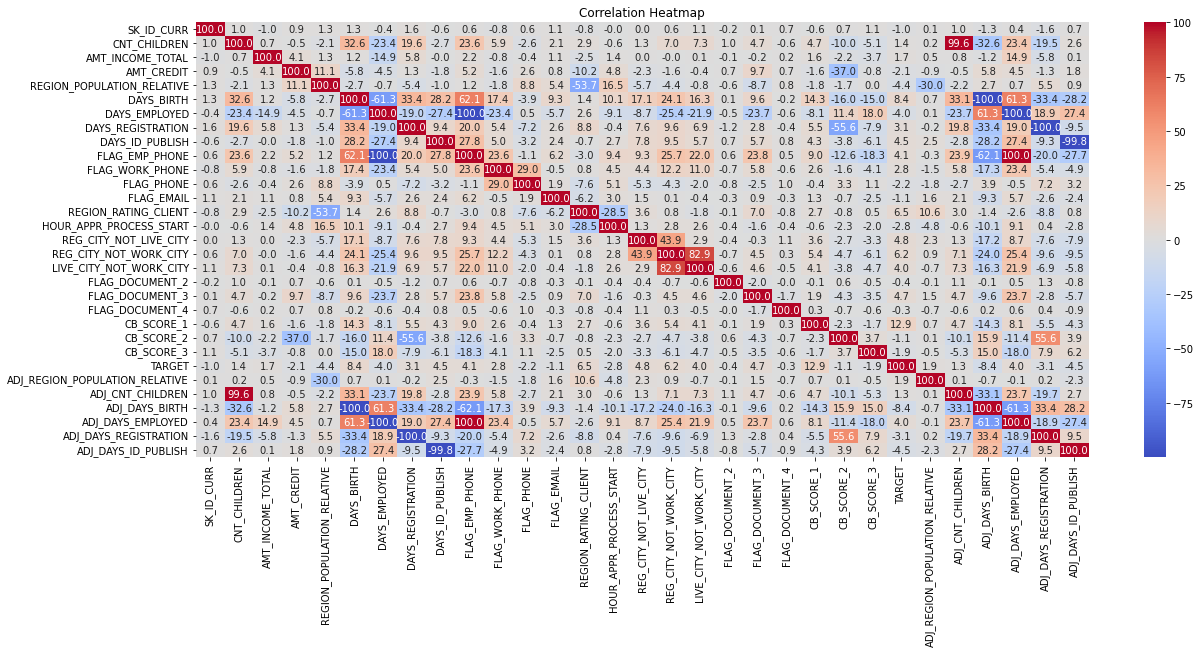

In [50]:
correlation_matrix = adj_df.corr()
percent_corr_matrix = correlation_matrix * 100
# 히트맵 그리기
plt.figure(figsize=(20, 8))  # 그래프 크기 조정
sns.heatmap(percent_corr_matrix, annot=True,fmt=".1f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap")  # 그래프 제목
plt.show()

In [51]:
pd.crosstab(adj_df['ADJ_DAYS_EMPLOYED'], adj_df['FLAG_EMP_PHONE'])

FLAG_EMP_PHONE,0,1
ADJ_DAYS_EMPLOYED,,
-1000.0,2999,0
1.0,0,517
2.0,0,1928
3.0,0,1693
4.0,0,1554
5.0,0,1201
6.0,0,1074
7.0,0,829
8.0,0,777


> 직업쪽이랑 연관이 있겠지

In [52]:
adj_df.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET', 'ADJ_ORGANIZATION_TYPE',
       'ADJ_REGION_POPULATION_RELATIVE', 'ADJ_CNT_CHILDREN', 'ADJ_DAYS_BIRTH',
       'ADJ_DAYS_EMPLOYED', 'ADJ_DAYS_REGISTRATION', 'ADJ_DAYS_ID_PUBLISH'],
      dtype='object')

In [53]:
# 교차표 생성
cross_tab = pd.crosstab([adj_df['ADJ_ORGANIZATION_TYPE'], adj_df['ADJ_DAYS_EMPLOYED']], adj_df['FLAG_EMP_PHONE'])

In [54]:
test_df = adj_df.loc[adj_df['FLAG_EMP_PHONE']==0, :]

In [55]:
for col in adj_df.columns : 
    print(test_df[col].value_counts(dropna = False))

100125    1
332445    1
331511    1
331575    1
331586    1
         ..
217649    1
218023    1
218033    1
218045    1
456095    1
Name: SK_ID_CURR, Length: 4294, dtype: int64
Cash loans         4050
Revolving loans     244
Name: NAME_CONTRACT_TYPE, dtype: int64
F      2465
NaN    1276
M       553
Name: CODE_GENDER, dtype: int64
Y      1929
NaN    1739
N       626
Name: FLAG_OWN_REALTY, dtype: int64
0    4131
1     125
2      25
3      10
4       2
5       1
Name: CNT_CHILDREN, dtype: int64
135000.0    447
112500.0    438
90000.0     402
157500.0    318
67500.0     283
           ... 
177750.0      1
499500.0      1
150750.0      1
66600.0       1
333000.0      1
Name: AMT_INCOME_TOTAL, Length: 210, dtype: int64
NaN          1312
675000.0      111
254700.0       96
225000.0       91
450000.0       64
             ... 
513040.5        1
358344.0        1
616261.5        1
1212426.0       1
733176.0        1
Name: AMT_CREDIT, Length: 931, dtype: int64
Pensioner    4294
Name: NAME_INCOME

<!-- Pensioner    4294 # 연금수령자 -> 나이가 많겠군 
Name: NAME_INCOME_TYPE, dtype: int64
   
365243.0    2999
NaN         1295
Name: DAYS_EMPLOYED, dtype: int64  # days_employed : 365243 그냥 결측으로 봐도 될듯
        
0    4294
Name: FLAG_WORK_PHONE, dtype: int64
        
0    4294
Name: REG_CITY_NOT_WORK_CITY, dtype: int64

0    4294
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64

NaN    4294
Name: ORGANIZATION_TYPE, dtype: int64

0    4294
Name: FLAG_DOCUMENT_2, dtype: int64        

0    4294
Name: FLAG_DOCUMENT_4, dtype: int64       

NaN    4294
Name: ADJ_ORGANIZATION_TYPE, dtype: int64        -->

백수라 고용일수 없는거니까 0으로 넣기 

In [56]:
adj_df['ADJ_DAYS_EMPLOYED'].value_counts()

-1000.0    2999
 2.0       1928
 3.0       1693
 4.0       1554
 5.0       1201
 6.0       1074
 7.0        829
 8.0        777
 9.0        676
 10.0       534
 1.0        517
 11.0       479
 12.0       365
 13.0       288
 14.0       256
 15.0       252
 16.0       212
 17.0       143
 18.0       122
 19.0       118
 20.0       106
 21.0        95
 22.0        95
 23.0        80
 24.0        59
 26.0        40
 27.0        39
 29.0        39
 25.0        35
 33.0        30
 31.0        29
 32.0        27
 35.0        26
 30.0        26
 28.0        25
 34.0        21
 36.0        16
 38.0        11
 40.0         8
 37.0         8
 41.0         4
 39.0         4
 44.0         2
 43.0         2
 42.0         2
 46.0         2
 47.0         2
 45.0         1
Name: ADJ_DAYS_EMPLOYED, dtype: int64

In [57]:
adj_df.loc[adj_df['ADJ_DAYS_EMPLOYED'] < 0, 'ADJ_DAYS_EMPLOYED'] = 0

*2.1 knn방법으로 결측치 대체해보기*

In [58]:
adj_df.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET', 'ADJ_ORGANIZATION_TYPE',
       'ADJ_REGION_POPULATION_RELATIVE', 'ADJ_CNT_CHILDREN', 'ADJ_DAYS_BIRTH',
       'ADJ_DAYS_EMPLOYED', 'ADJ_DAYS_REGISTRATION', 'ADJ_DAYS_ID_PUBLISH'],
      dtype='object')

결측치 대체와 관련없거나 상관성 높은 column drop 

In [256]:
adj_df_v2 = adj_df.drop(columns = ['ORGANIZATION_TYPE','SK_ID_CURR', 'CNT_CHILDREN', 'DAYS_BIRTH','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH'])

In [257]:
adj_df_v2.isna().sum()
# object : CODE_GENDER, FLAG_OWN_REALTY, ADJ_ORGANIZATION_TYPE                    
# float  : AMT_CREDIT, CB_SCORE1, CB_SCORE2, CB_SCORE3

NAME_CONTRACT_TYPE                   0
CODE_GENDER                       7095
FLAG_OWN_REALTY                   9571
AMT_INCOME_TOTAL                     0
AMT_CREDIT                        7300
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   1
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE        7149
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_PHONE                           0
FLAG_EMAIL                           0
REGION_RATING_CLIENT                 0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
FLAG_DOCUMENT_2                      0
FLAG_DOCUMENT_3                      0
FLAG_DOCUMENT_4                      0
CB_SCORE_1                        6146
CB_SCORE_2                        8274
CB_SCORE_3               

In [260]:
adj_df_v2.head(10)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,...,CB_SCORE_2,CB_SCORE_3,TARGET,ADJ_ORGANIZATION_TYPE,ADJ_REGION_POPULATION_RELATIVE,ADJ_CNT_CHILDREN,ADJ_DAYS_BIRTH,ADJ_DAYS_EMPLOYED,ADJ_DAYS_REGISTRATION,ADJ_DAYS_ID_PUBLISH
0,Cash loans,M,Y,202500.0,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,...,NaN,58.349224,1,Business and Self-employed,1.0,0,25.0,3.0,11.0,7.0
1,Revolving loans,NaN,NaN,67500.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,NaN,...,57.600542,46.433666,0,Government and Security,NaN,0,51.0,NaN,13.0,8.0
2,Cash loans,M,N,108000.0,509602.5,Working,Secondary / secondary special,Married,House / apartment,0.018634,...,63.496369,NaN,0,Government and Security,2.0,0,34.0,NaN,NaN,12.0
3,Cash loans,M,N,135000.0,NaN,Working,Secondary / secondary special,Married,House / apartment,0.026392,...,45.996152,68.694333,0,Business and Self-employed,3.0,2,30.0,3.0,1.0,NaN
4,Cash loans,NaN,Y,202500.0,604152.0,Working,Secondary / secondary special,Married,House / apartment,0.009175,...,NaN,NaN,0,Industry and Construction,4.0,0,NaN,2.0,NaN,2.0
5,Cash loans,NaN,Y,360000.0,1506816.0,Working,Secondary / secondary special,Married,House / apartment,0.010006,...,47.467175,NaN,0,Logistics and Services,5.0,0,49.0,27.0,16.0,6.0
6,Cash loans,F,Y,225000.0,314055.0,Commercial associate,Higher education,Married,House / apartment,0.006629,...,61.701918,NaN,0,Business and Self-employed,6.0,2,28.0,5.0,7.0,NaN
7,Cash loans,NaN,Y,202500.0,796396.5,Working,Higher education,Married,House / apartment,0.008019,...,NaN,59.403718,0,Industry and Construction,7.0,2,43.0,NaN,10.0,12.0
8,Cash loans,NaN,N,126000.0,327024.0,Working,Secondary / secondary special,Single / not married,House / apartment,NaN,...,NaN,64.084047,0,Logistics and Services,NaN,1,NaN,2.0,20.0,17.0
9,Cash loans,F,N,126000.0,263686.5,Pensioner,Secondary / secondary special,Married,House / apartment,0.009549,...,69.266436,65.553303,0,NaN,8.0,0,58.0,NaN,NaN,NaN


0. 결측데이터간 eda 진행 

1. KNN 결측치 채우기 진행

관련 라이브러리 import

In [261]:
# !pip install fancyimpute

In [262]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error
from fancyimpute import IterativeImputer
# from fancyimpute import KNN, IterativeImputer

함수 1 : 범주형 변수 유효값 딕셔너리 생성 함수 

In [263]:
def find_category_mappings(df, variable):
    return {k: i for i, k in enumerate(df[variable].dropna().unique(), 0)}

함수 2 : 유효값-숫자로 매칭해, 숫자로 변환해주는 함수 

In [264]:
def integer_encode(df , variable, ordinal_mapping):
    df[variable] = df[variable].map(ordinal_mapping)

함수 3 : knn 대체 진행 (범주형까지 적용) 

In [265]:
mm_scaler = MinMaxScaler()
mappin = dict()

In [266]:
adj_df_v2.isna().sum()

NAME_CONTRACT_TYPE                   0
CODE_GENDER                       7095
FLAG_OWN_REALTY                   9571
AMT_INCOME_TOTAL                     0
AMT_CREDIT                        7300
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   1
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE        7149
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_PHONE                           0
FLAG_EMAIL                           0
REGION_RATING_CLIENT                 0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
FLAG_DOCUMENT_2                      0
FLAG_DOCUMENT_3                      0
FLAG_DOCUMENT_4                      0
CB_SCORE_1                        6146
CB_SCORE_2                        8274
CB_SCORE_3               

In [307]:
data = adj_df_v2.drop('TARGET', axis=1); y = adj_df_v2['TARGET']

In [308]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [309]:
# 범주형 변수와 연속형 변수 분리
categorical_cols = data.select_dtypes(include='object').columns.tolist()
continuous_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()

In [310]:
categorical_cols.append('ADJ_REGION_POPULATION_RELATIVE')

In [311]:
continuous_cols.remove('ADJ_REGION_POPULATION_RELATIVE')

In [312]:
# df1 : data 
# cols : categorical columns 
# scaler : MinMax or StandardSclaer
# algorithm : KNN-imputation, MICE-imputation 

def imputation(df1=X_train, df2=X_test, cols=categorical_cols, scaler=mm_scaler, algorithm = KNNImputer()):
    
    #  label 유효값 딕셔너리 생성 
    for variable in cols:
        mappings = find_category_mappings(df1, variable)
        mappin[variable] = mappings

    # label들 숫자로 변환 (결측치는 보존) : train, xtest data 전부 
    for variable in cols:
        integer_encode(df1, variable, mappin[variable])  
        integer_encode(df2, variable, mappin[variable])  

    # 범주형 변수에 대한 min-max scaling 
    sca_xtrain = scaler.fit_transform(df1) 
    imputer = algorithm
    impute_xtrain = imputer.fit_transform(sca_xtrain) # 범주숫자에 대한 스케일링 진행됨 
    
    # test set에 scaling & knn 대체 동일하게 적용
    sca_xtest = scaler.transform(df2)
    impute_xtest = imputer.transform(sca_xtest) 
    
    #  knn
    df1.iloc[:,:] = scaler.inverse_transform(impute_xtrain) 
    df2.iloc[:,:] = scaler.inverse_transform(impute_xtest) 
    
    for i in cols : 
        df1[i] = round(df1[i]).astype('int')
        df2[i] = round(df2[i]).astype('int')
    
    del scaler
#    # Inverse transform
#     for i in cols:
#         inv_map = {v: k for k, v in mappin[i].items()}
#         df[i] = df[i].map(inv_map)
#         df2[i] = df2[i].map(inv_map)
    return df1, df2

방법 1. KNN-Imputation 

In [313]:
knn_impute_dat = imputation(X_train, X_test, categorical_cols, mm_scaler, KNNImputer()) # knn-imputer

In [314]:
knn_X_train, knn_X_test = knn_impute_dat

In [315]:
knn_model = KNeighborsClassifier()
knn_model.fit(knn_X_train, y_train)
y_pred_knn = knn_model.predict(knn_X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

In [316]:
print('<KNN-Imputer 결측치 대체 결과>\n',  '정확도:', accuracy_knn, '\n MSE:', mse_knn, '\n AUC:', auc_knn) # auc 가 많이 떨어짐 

<KNN-Imputer 결측치 대체 결과>
 정확도: 0.9127083333333333 
 MSE: 0.08729166666666667 
 AUC: 0.5030373999626432


In [277]:
# cross_tab = pd.crosstab(y_test, y_pred_knn)

In [278]:
# cross_tab

방법 2. MICE-imputation 

In [317]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [318]:
mice_impute_dat = imputation(X_train, X_test, categorical_cols, mm_scaler, IterativeImputer()) # mice-imputer

C:\Users\mlosv\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [319]:
mice_X_train, mice_X_test = mice_impute_dat

In [320]:
knn_model = KNeighborsClassifier()
knn_model.fit(mice_X_train, y_train)
y_pred_mice = knn_model.predict(mice_X_test)

accuracy_mice = accuracy_score(y_test, y_pred_mice)
auc_mice = roc_auc_score(y_test, y_pred_mice)
mse_mice = mean_squared_error(y_test, y_pred_mice)

In [321]:
print('<MICE-Imputer 결측치 대체 결과>\n',  '정확도:', accuracy_mice, '\n MSE:', mse_mice, '\n AUC:', auc_mice) # auc 가 많이 떨어짐 

<MICE-Imputer 결측치 대체 결과>
 정확도: 0.91375 
 MSE: 0.08625 
 AUC: 0.5004769207257627


만약 범주형 변수를 그대로 라벨 인코딩 한다면? 

In [322]:
X = adj_df_v2.drop('TARGET', axis=1); y = adj_df_v2['TARGET']

In [323]:
for variable in categorical_cols:
    label_encoder = LabelEncoder()
    X[variable] = label_encoder.fit_transform(X[variable])

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [325]:
def numeric_imputation(df1=X_train, df2=X_test, algorithm = KNNImputer()):
    
    imputer = algorithm
    df1 = imputer.fit_transform(df1) # 범주숫자에 대한 스케일링 진행됨 
    
    # test set에 scaling & knn 대체 동일하게 적용
    df2 = imputer.transform(df2) 
    
    return df1, df2

방법 3. KNN-Imputation (라벨인코딩 후) 

In [326]:
knn_X_train, knn_X_test = numeric_imputation(X_train, X_test, KNNImputer())

In [327]:
knn_model = KNeighborsClassifier()
knn_model.fit(knn_X_train, y_train)
y_pred_knn = knn_model.predict(knn_X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
auc_knn = roc_auc_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)

print('<KNN-Imputer(only-numeric) 결측치 대체 결과>\n',  '정확도:', accuracy_knn, '\n MSE:', mse_knn, '\n AUC:', auc_knn) # auc 가 많이 떨어짐 

<KNN-Imputer(only-numeric) 결측치 대체 결과>
 정확도: 0.9141666666666667 
 MSE: 0.08583333333333333 
 AUC: 0.5009090909090909


방법 4. MICE-Imputation (라벨인코딩 후) 

In [328]:
mice_X_train, mice_X_test = numeric_imputation(X_train, X_test, IterativeImputer())

In [329]:
knn_model = KNeighborsClassifier()
knn_model.fit(mice_X_train, y_train)
y_pred_mice = knn_model.predict(mice_X_test)

accuracy_mice = accuracy_score(y_test, y_pred_mice)
auc_mice = roc_auc_score(y_test, y_pred_mice)
mse_mice = mean_squared_error(y_test, y_pred_mice)

In [330]:
print('<MICE-Imputer(only-numeric)| 결측치 대체 결과>\n',  '정확도:', accuracy_mice, '\n MSE:', mse_mice, '\n AUC:', auc_mice) # auc 가 많이 떨어짐 

<MICE-Imputer(only-numeric)| 결측치 대체 결과>
 정확도: 0.9129166666666667 
 MSE: 0.08708333333333333 
 AUC: 0.5013636363636363


결측 대체 방법 

In [294]:
na_category_cols = ['CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_FAMILY_STATUS', 'ADJ_ORGANIZATION_TYPE', 'ADJ_REGION_POPULATION_RELATIVE']

In [303]:
na_continuous_cols = ['AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3',  'ADJ_DAYS_BIRTH', 'ADJ_DAYS_EMPLOYED', 'ADJ_DAYS_REGISTRATION', 'ADJ_DAYS_ID_PUBLISH']

In [333]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)
knn_X_train, knn_X_test = knn_impute_dat
mice_X_train, mice_X_test = mice_impute_dat

In [337]:
import matplotlib.pyplot as plt

# 연속형 변수의 히스토그램 그리기
def plot_continuous_histogram(data1, data2, data3, column):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    axes[0].hist(data1[column], bins=20)
    axes[0].set_title('Original Data - Histogram of {}'.format(column))
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    
    axes[1].hist(data2[column], bins=20)
    axes[1].set_title('KNN-imputation Data - Histogram of {}'.format(column))
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    
    
    axes[2].hist(data3[column], bins=20)
    axes[2].set_title('MICE-imputation Data - Histogram of {}'.format(column))
    axes[2].set_xlabel(column)
    axes[2].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

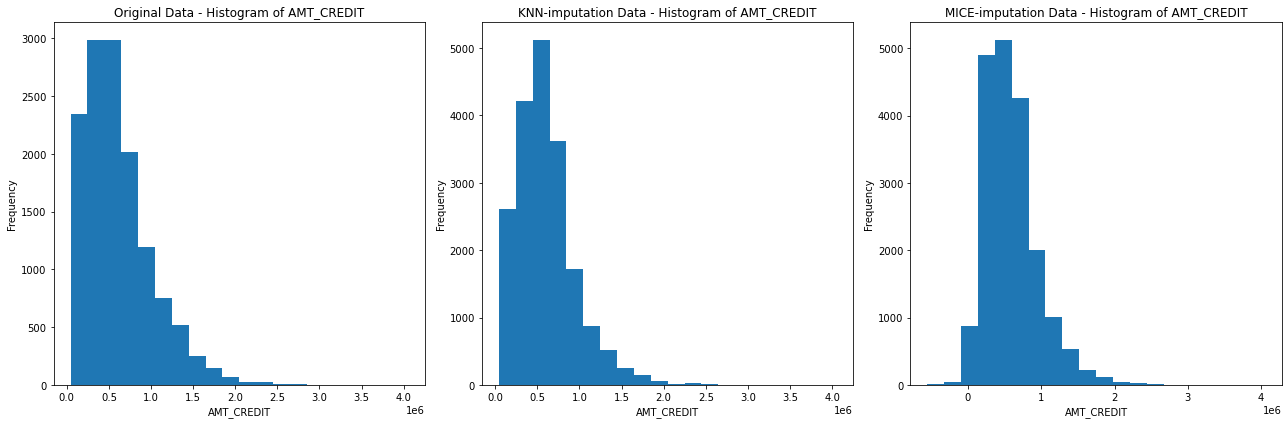

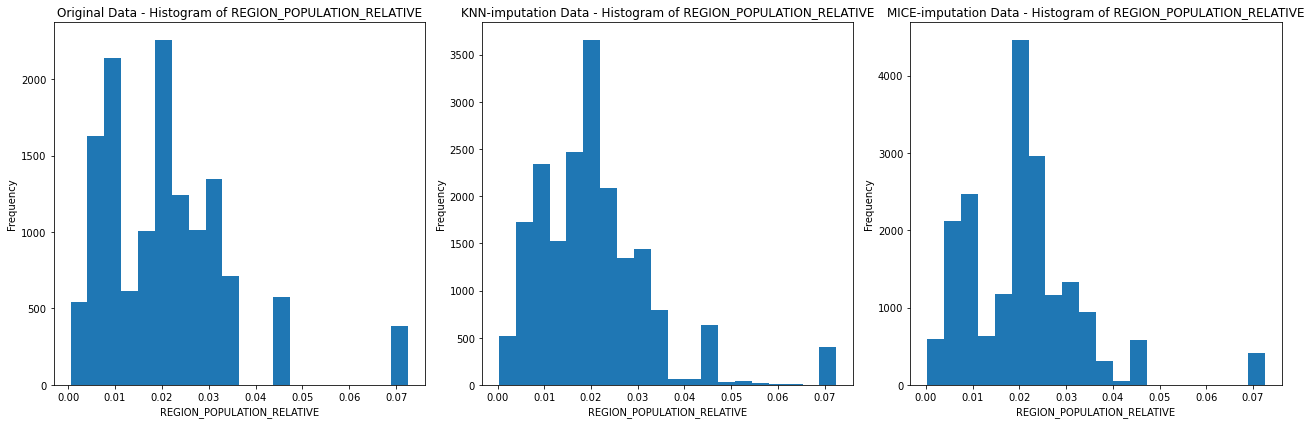

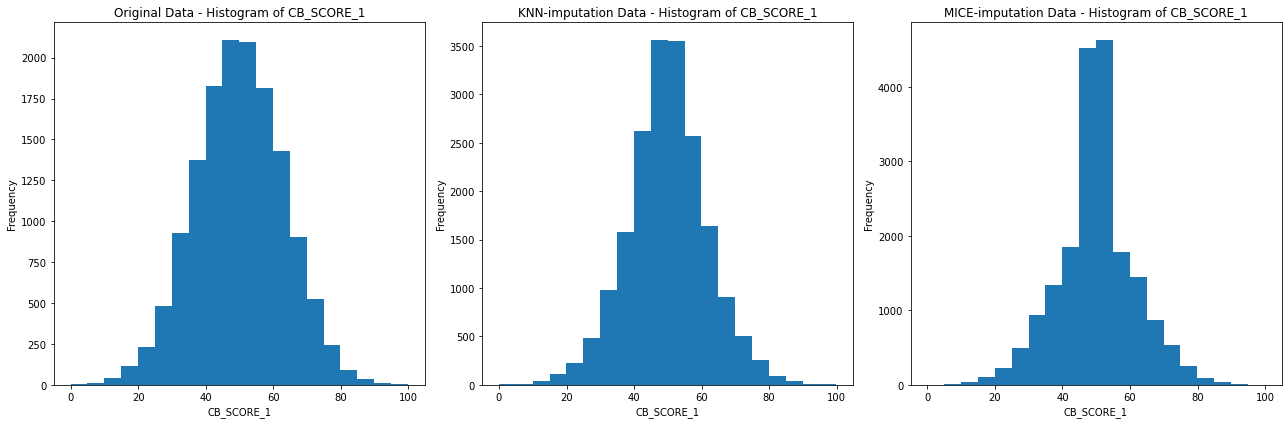

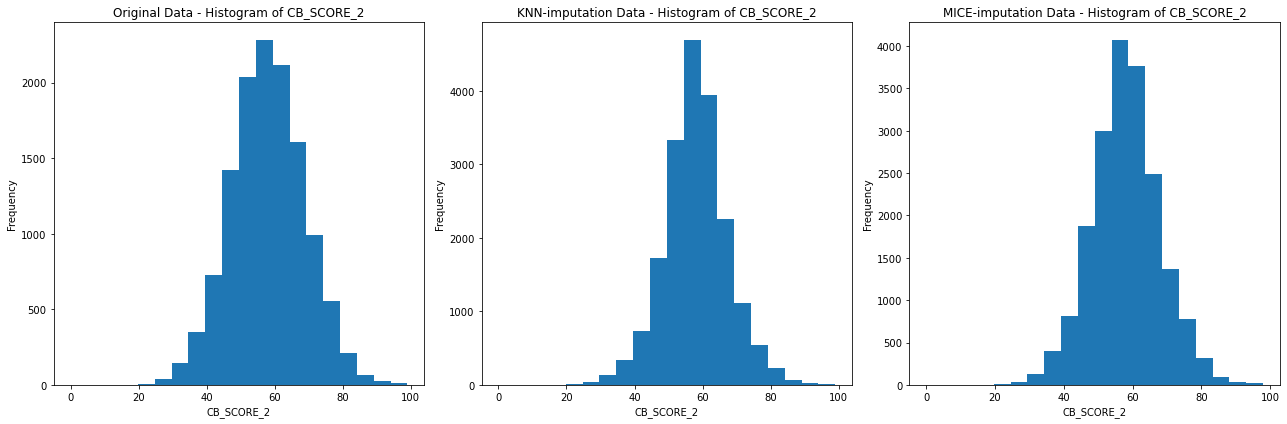

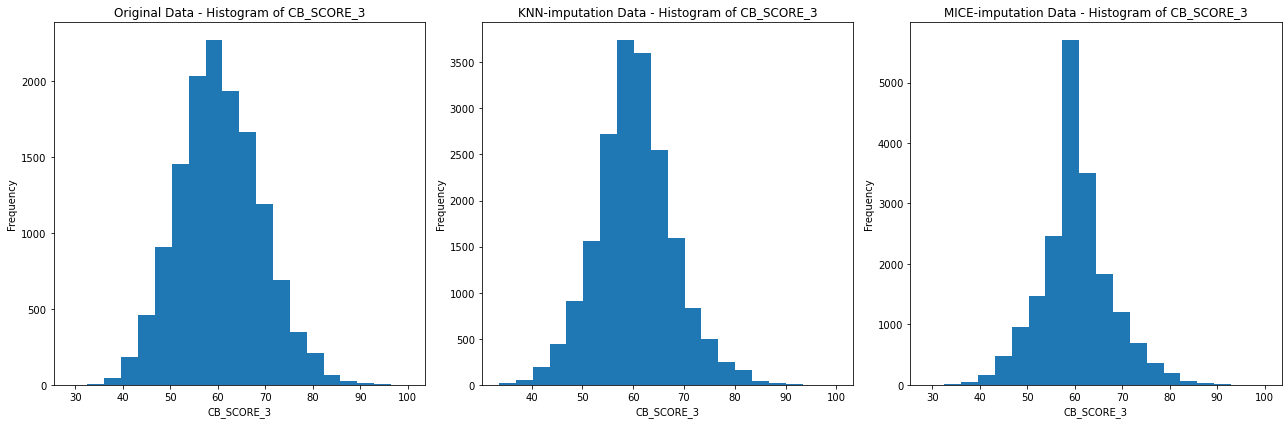

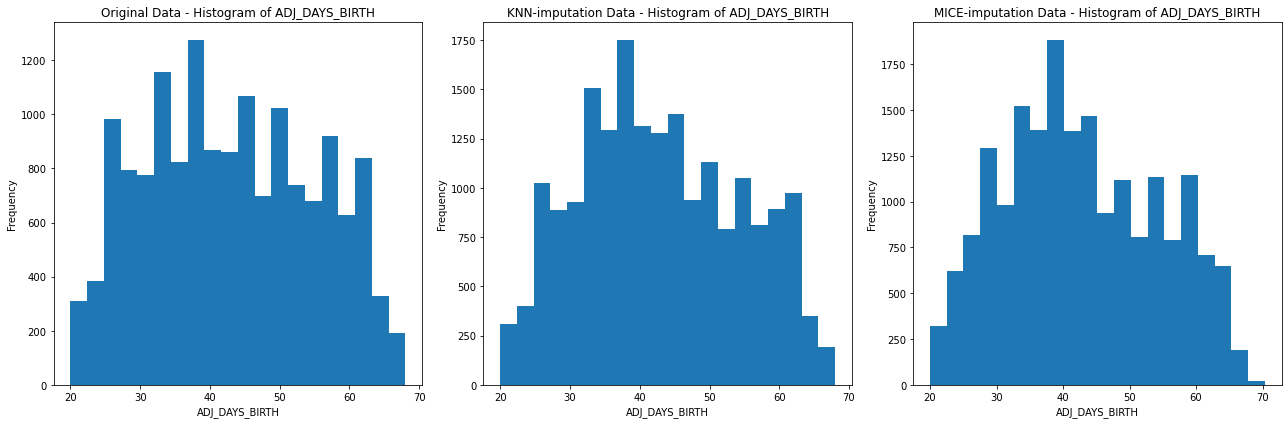

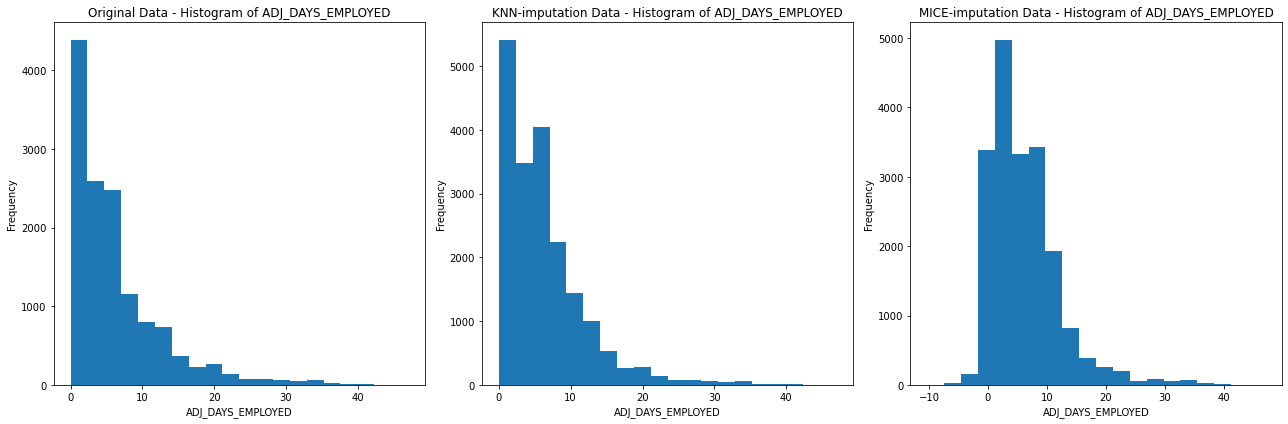

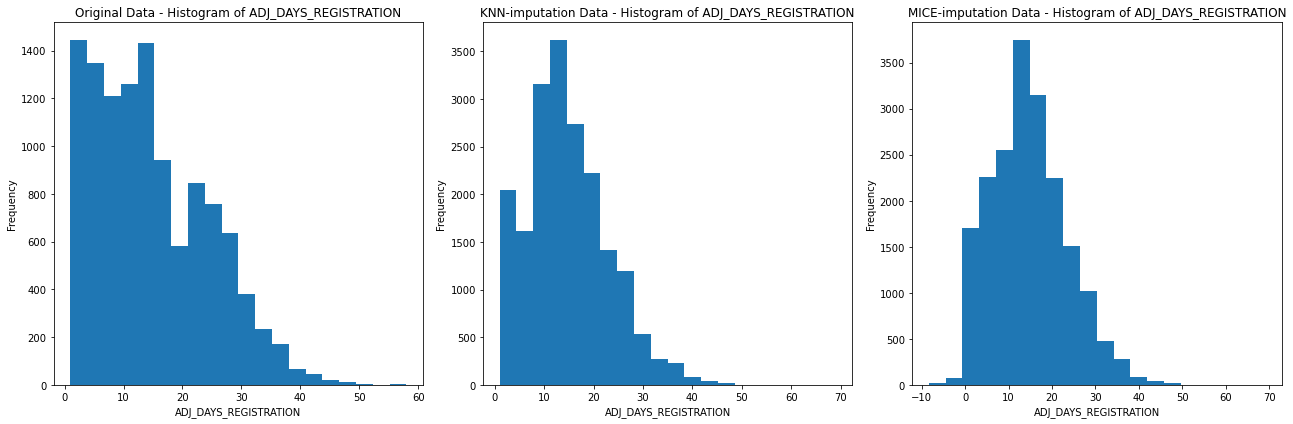

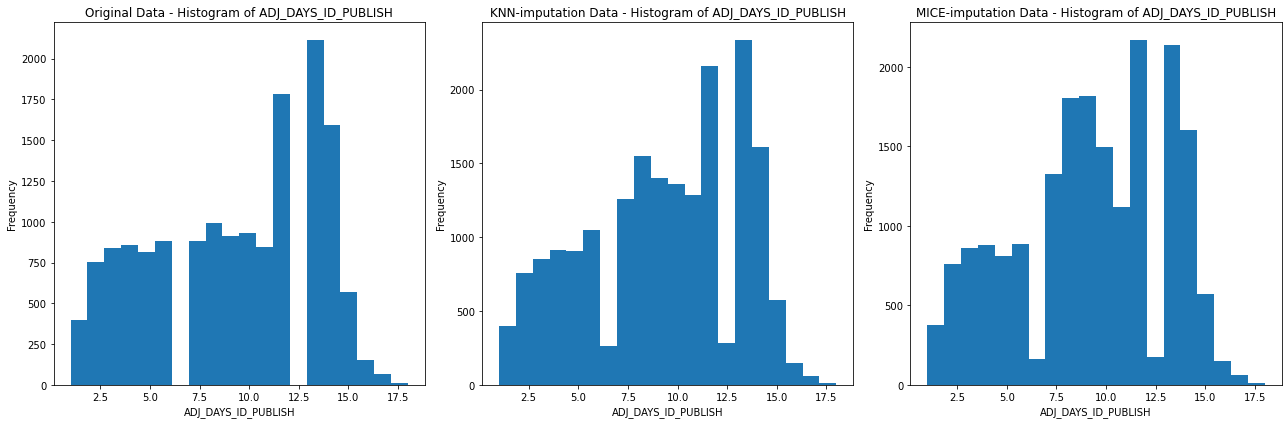

In [338]:
for col in na_continuous_cols : 
    plot_continuous_histogram(X_train, knn_X_train, mice_X_train, col)

In [355]:
# 범주형 변수의 바 그래프 그리기
def plot_categorical_barplot(data1, data2, data3, column):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    
    value_counts_data1 = data1[column].value_counts(normalize = True)
    ax[0].bar(value_counts_data1.index.tolist(), value_counts_data1.values.tolist())
    
    ax[0].set_title('Original Data - Bar Plot of {}'.format(column))
    ax[0].set_xlabel(column)
    ax[0].set_ylabel('Count')
     
    value_counts_data2 = data2[column].value_counts(normalize = True)
    ax[1].bar(value_counts_data2.index.tolist(), value_counts_data2.values.tolist())
     
    ax[1].set_title('KNN-imputation Data - Bar Plot of {}'.format(column))
    ax[1].set_xlabel(column)
    ax[1].set_ylabel('Count')

    value_counts_data3 = data3[column].value_counts(normalize = True)
    ax[2].bar(value_counts_data3.index.tolist(), value_counts_data3.values.tolist())
     
    ax[2].set_title('MICE-imputation Data - Bar Plot of {}'.format(column))
    ax[2].set_xlabel(column)
    ax[2].set_ylabel('Count')
    
    plt.tight_layout()
    plt.show()

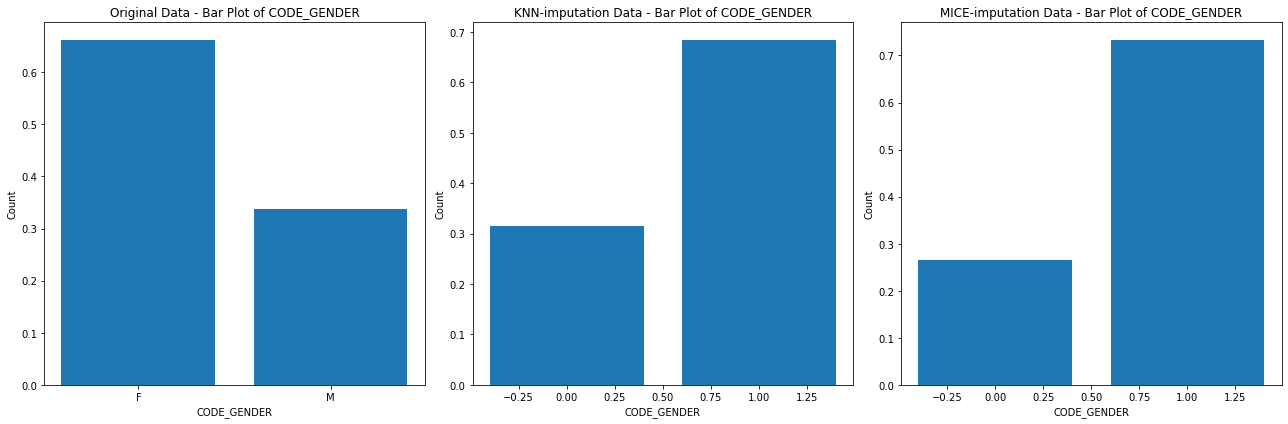

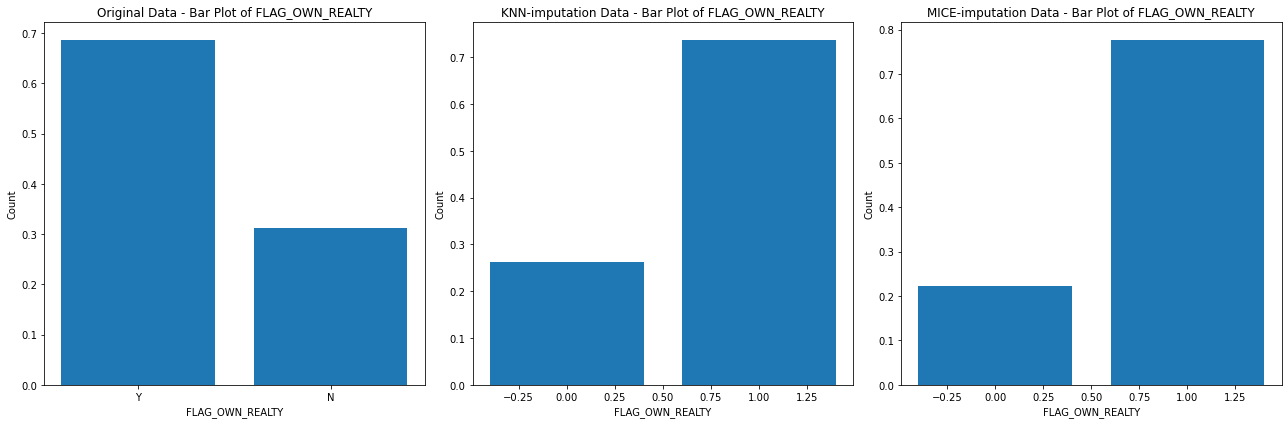

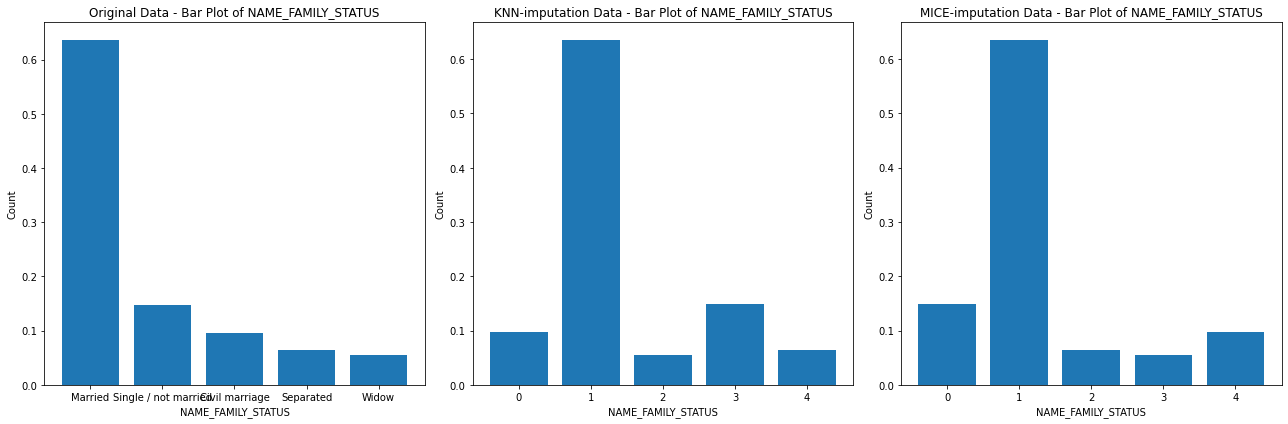

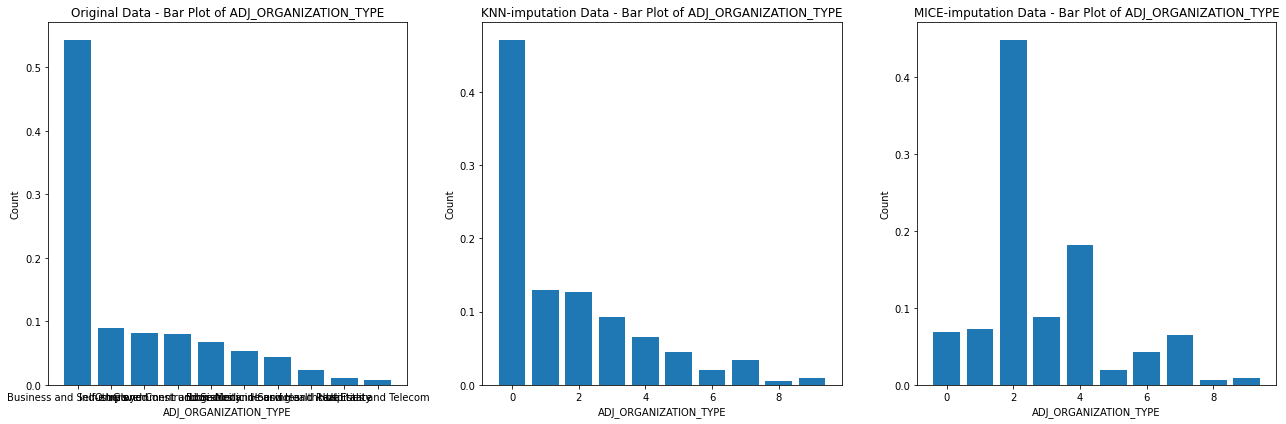

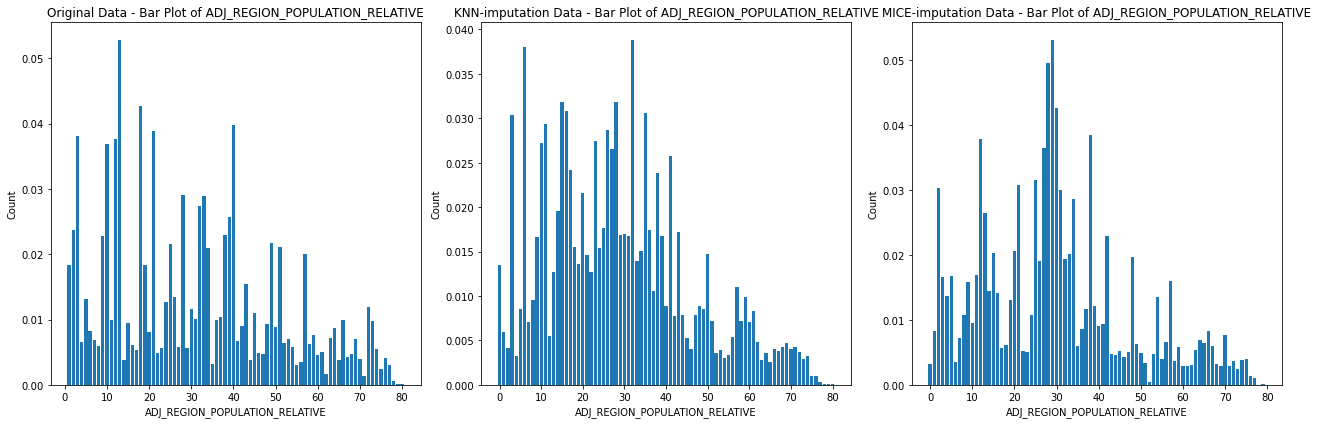

In [356]:
for col in na_category_cols : 
    plot_categorical_barplot(X_train, knn_X_train, mice_X_train, col)

# 파생변수 생성

In [394]:
# 결측치가 있는 컬럼들 찾기
columns_with_missing_values = data.columns[data.isnull().any()].tolist()

# 각 결측치가 있는 컬럼에 대해 결측치 여부를 나타내는 새로운 컬럼 생성 (knn, mice impute 데이터에)
for column in columns_with_missing_values:
    new_column_name = column + '_missing'
    mice_X_train[new_column_name] = data[column].isnull().astype(int)
    knn_X_train[new_column_name] = data[column].isnull().astype(int)

In [395]:
from sklearn.ensemble import RandomForestClassifier

In [396]:
# KNN-imputation data 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier()
rf_model.fit(knn_X_train, y_train)

# KNN-imputation data 변수 중요도 계산
rf_feature_importances = rf_model.feature_importances_

# MICE-imputation data 랜덤 포레스트 모델 생성 및 학습
rf_model = RandomForestClassifier()
rf_model.fit(mice_X_train, y_train)

# MICE-imputation data 변수 중요도 계산
mice_feature_importances = rf_model.feature_importances_

In [403]:
# 변수 중요도 시각화
def plot_feature_importance(feature_names, rf_feature_importances, mice_feature_importances):
    sorted_idx = np.argsort(rf_feature_importances)
    pos = np.arange(sorted_idx.shape[0]) + .5

    fig, ax = plt.subplots(1, 2, figsize=(20, 10))
    ax[0].barh(pos, rf_feature_importances[sorted_idx], align='center')
    ax[0].set_yticks(pos)
    ax[0].set_yticklabels(np.array(feature_names)[sorted_idx])
    ax[0].set_xlabel('Kre Importance')
    ax[0].set_title('Variable Importance')
    
    sorted_idx = np.argsort(mice_feature_importances)
    pos = np.arange(sorted_idx.shape[0]) + .5

    ax[1].barh(pos, mice_feature_importances[sorted_idx], align='center')
    ax[1].set_yticks(pos)
    ax[1].set_yticklabels(np.array(feature_names)[sorted_idx])
    ax[1].set_xlabel('Kre Importance')
    ax[1].set_title('Variable Importance')
    
    plt.tight_layout()
    plt.show()


In [404]:
column_names = knn_X_train.columns 

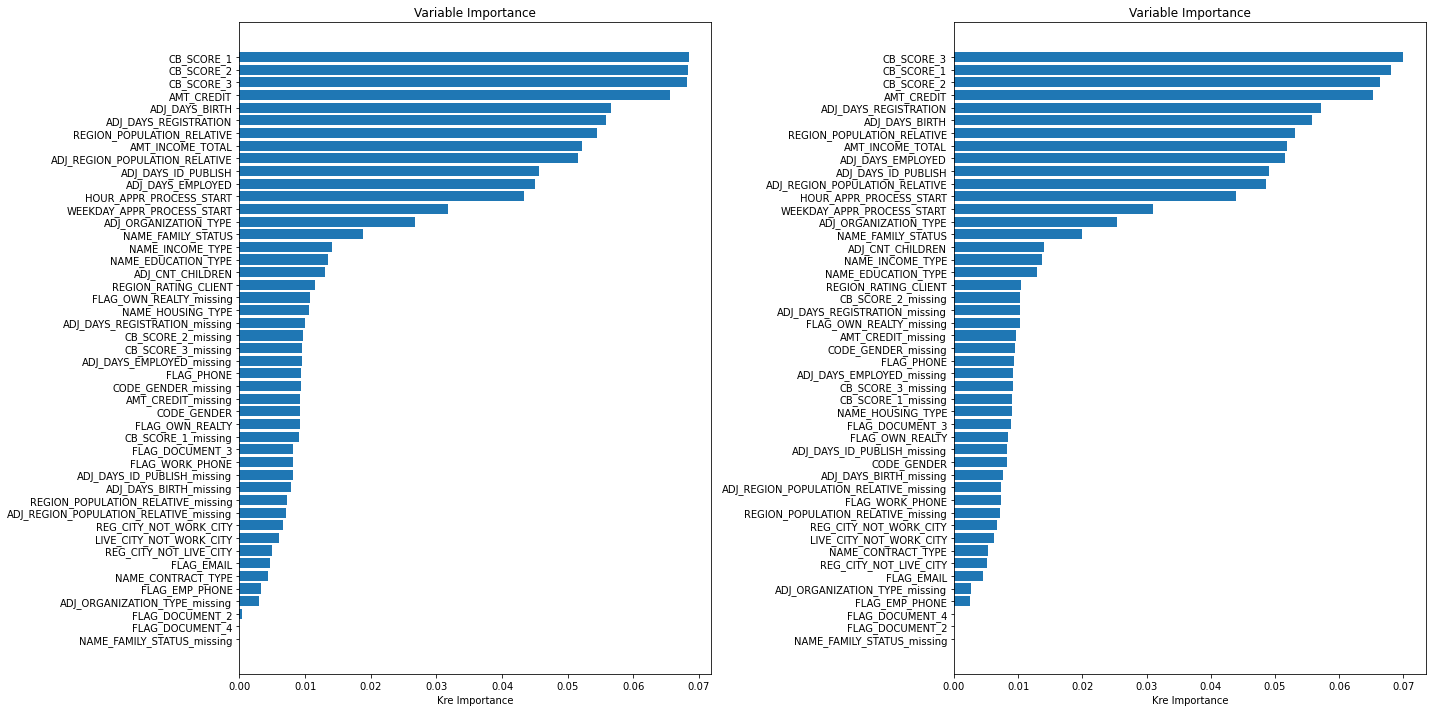

In [405]:
plot_feature_importance(column_names, rf_feature_importances, mice_feature_importances)

In [406]:
tmp_cols = ['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'AMT_CREDIT'
            , 'ADJ_DAYS_BIRTH', 'ADJ_DAYS_REGISTRATION', 'REGION_POPULATION_RELATIVE']

In [407]:
mice_X_train, mice_X_test = mice_impute_dat

In [408]:
knn_model = KNeighborsClassifier()
knn_model.fit(mice_X_train[tmp_cols], y_train)
y_pred_mice = knn_model.predict(mice_X_test[tmp_cols])

accuracy_mice = accuracy_score(y_test, y_pred_mice)
auc_mice = roc_auc_score(y_test, y_pred_mice)
mse_mice = mean_squared_error(y_test, y_pred_mice)

In [409]:
print('<MICE-Imputer 결측치 대체 결과>\n',  '정확도:', accuracy_mice, '\n MSE:', mse_mice, '\n AUC:', auc_mice) # auc 가 많이 떨어짐 

<MICE-Imputer 결측치 대체 결과>
 정확도: 0.9077083333333333 
 MSE: 0.09229166666666666 
 AUC: 0.5013404588835794


In [410]:
rf_model = RandomForestClassifier()
rf_model.fit(mice_X_train[tmp_cols], y_train)
y_pred_mice = rf_model.predict(mice_X_test[tmp_cols])

accuracy_mice = accuracy_score(y_test, y_pred_mice)
auc_mice = roc_auc_score(y_test, y_pred_mice)
mse_mice = mean_squared_error(y_test, y_pred_mice)

In [411]:
print('<MICE-Imputer 결측치 대체 결과>\n',  '정확도:', accuracy_mice, '\n MSE:', mse_mice, '\n AUC:', auc_mice) # auc 가 많이 떨어짐 

<MICE-Imputer 결측치 대체 결과>
 정확도: 0.91125 
 MSE: 0.08875 
 AUC: 0.5011709601873536


방법 5. GAIN 알고리즘 

In [167]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy, MeanSquaredError

In [168]:
# X와 y 분리
X = adj_df_v2.drop('TARGET', axis=1); y = adj_df_v2['TARGET']

# 연속형 변수와 범주형 변수 분리 (예시)
categorical_cols = X.select_dtypes(include='object').columns.tolist()
continuous_cols = X.select_dtypes(include=['float64', 'int64']).columns.tolist()

X_continuous = X[continuous_cols]
X_categorical = X[categorical_cols]

In [169]:
# 데이터 스케일링 (연속형 변수)
scaler_continuous = MinMaxScaler()
X_continuous_scaled = scaler_continuous.fit_transform(X_continuous)

In [170]:
# 레이블 인코딩 (범주형 변수)
encoder_categoricals = {}
# X_categorical_encoded = {}
for col in categorical_cols:
    encoder_categoricals[col] = LabelEncoder()
    X_categorical[col] = encoder_categoricals[col].fit_transform(X_categorical[col])

C:\Users\mlosv\AppData\Local\Temp\ipykernel_23284\3559380252.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_categorical[col] = encoder_categoricals[col].fit_transform(X_categorical[col])


In [172]:
# 결합된 입력 데이터 생성 및 훈련/테스트 세트 분할 
X_combined_scaled_encoded= pd.concat([pd.DataFrame(X_continuous_scaled, columns=continuous_cols),
                                      pd.DataFrame(X_categorical, columns=categorical_cols)], axis=1)


In [173]:
X_train, X_test, y_train, y_test=train_test_split(X_combined_scaled_encoded,y,test_size=0.2)
input_dim=X_combined_scaled_encoded.shape[1]

In [133]:
# Generator 모델 정의
def build_generator(input_dim):
    inputs=Input(shape=(input_dim,))
    x=Dense(128,'relu')(inputs)
    x=Dense(128,'relu')(x)
    outputs=Dense(input_dim)(x)
    generator_model=Model(inputs,outputs=outputs,name='generator')
    return generator_model


In [151]:
# Discriminator 모델 정의 
def build_discriminator(input_dim):
    inputs=tf.keras.Input(shape=(input_dim,))
    x=tf.keras.layers.Dense(128,'relu')(inputs)
    x=tf.keras.layers.Dense(128,'relu')(x)
    outputs=tf.keras.layers.Dense(1)(x)
 
    discriminator_model=Model(inputs,outputs=outputs,name='discriminator')
    
    return discriminator_model
    

In [152]:

# GAIN 모델 정의 및 컴파일 
def build_gain(generator_model,discriminator_model):
    input_real_X_d=gain.generator.input_real_X_dscrmtrmstcs=input_size_real_X_dscrmtrmstcs=[None,X_train.shape[1]]
    input_fake_X_d=gain.generator.input_fake_X_dscrmtrmstcs=input_size_fake_X_dscrmtrmstcs=[None,X_train.shape[1]]
    gain.generator.inputs=input_real_X_d,gain.generator.inputs=input_fake_X_d

    real_output_D=gain.discriminator(real_input_D) 
    fake_output_D=gain.discriminator(fake_input_D)

    gain.discriminator.inputs=fake_input_D,gain.discriminator.inputs=fake_output_G

    # 손실 함수 설정 
    loss_GAN=GAIN_loss(y_true=y_true,y_pred=y_pred,marginal_posterior=marginal_posterior,sampling_posterior=sampling_posterior,lamda=lambda_val,sample_size=batch_size,n_features=n_features,n_labels=n_labels)
    loss_generator=GAIN_loss_generator(y_true=y_true,y_pred=y_pred,marginal_posterior=marginal_posterior,sampling_posterior=sampling_posterior,lamda=lambda_val,sample_size=batch_size,n_features=n_features,n_labels=n_labels)

    loss_discriminator=GAIN_loss_discriminator(y_true=y_true,y_pred=y_pred,marginal_prior=marginal_prior,marginal_missing=marginal_missing,
                                              marginal_generated=marginal_generated,lamda=lambda_val,sample_size=batch_size,
                                              n_features=n_features,n_labels=n_labels)

    gain.compile(loss={'discriminator':loss_discriminator,'generator':loss_generator},optimizer='adam')

    return gain

In [177]:

 # GAIN 알고리즘 학습 

generator_model=build_generator(input_dim)
discriminator_model=build_discriminator(input_dim)


In [180]:

gan_input_real_samples_placeholder=tf.data.Dataset.from_tensor_slices(real_imputed_samples).batch(batch_sz).repeat().make_one_shot_iterator().get_next()


NameError: name 'real_imputed_samples' is not defined

In [155]:

def build_gan(generator_model, discriminator_model):
    gan_input = Input(shape=(input_dim,))
    generated_data = generator_model(gan_input)
    gan_output = discriminator_model(generated_data)

    gan = Model(gan_input, gan_output)
    
    return gan

gan = build_gan(generator_model, discriminator_model)


In [158]:

# 손실 함수 설정
loss_discriminator = tf.keras.losses.BinaryCrossentropy(from_logits=True)
loss_generator = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# 옵티마이저 설정
optimizer_discriminator = tf.keras.optimizers.Adam(learning_rate=0.001)
optimizer_generator = tf.keras.optimizers.Adam(learning_rate=0.001)

# 컴파일
gan.compile(optimizer=optimizer_generator, loss=loss_discriminator)

In [160]:
# GAIN 알고리즘 학습 
# gan.build_gain(build_generator(input_dim),build__discriminator(input_dim))

gan.fit({'generator':np.concatenate([real_imputed_samples,fake_samples]),'discriminator':np.concatenate([real_samples,np.repeat(np.nan,batch_sz)])},
         {'generator':np.concatenate([real_samples,np.repeat(np.nan,batch_sz)]),'discriminator':[np.ones((batch_sz*2)),np.zeros(batch_sz)]},
         epochs=num_epochs,batch_siz=batch_sz)


NameError: name 'real_imputed_samples' is not defined

결측있는 변수를 제거해본다면 ? 

In [595]:
data = adj_df_v2.drop('TARGET', axis=1); y = adj_df_v2['TARGET']

In [596]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2)

In [601]:
X_train.isna().sum()

NAME_CONTRACT_TYPE                   0
CODE_GENDER                       5697
FLAG_OWN_REALTY                   7647
AMT_INCOME_TOTAL                     0
AMT_CREDIT                        5850
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   1
NAME_HOUSING_TYPE                    0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_PHONE                           0
FLAG_EMAIL                           0
REGION_RATING_CLIENT                 0
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
REG_CITY_NOT_LIVE_CITY               0
REG_CITY_NOT_WORK_CITY               0
LIVE_CITY_NOT_WORK_CITY              0
FLAG_DOCUMENT_2                      0
FLAG_DOCUMENT_3                      0
FLAG_DOCUMENT_4                      0
CB_SCORE_1                        4915
CB_SCORE_2                        6540
CB_SCORE_3                        5745
ADJ_ORGANIZATION_TYPE    

In [602]:
categorical_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ADJ_ORGANIZATION_TYPE'],
      dtype='object')

In [ ]:
X_train.drop(['CODE_GENDER', 'FLAG_OWN_REALTY', ])

In [591]:
mice_X_train, mice_X_test = numeric_imputation(X_train, X_test, IterativeImputer())

In [592]:
knn_model = KNeighborsClassifier()
knn_model.fit(mice_X_train, y_train)
y_pred_mice = knn_model.predict(mice_X_test)

accuracy_mice = accuracy_score(y_test, y_pred_mice)
auc_mice = roc_auc_score(y_test, y_pred_mice)
mse_mice = mean_squared_error(y_test, y_pred_mice)

In [593]:
print('<MICE-Imputer(only-numeric)| 결측치 대체 결과>\n',  '정확도:', accuracy_mice, '\n MSE:', mse_mice, '\n AUC:', auc_mice) # auc 가 많이 떨어짐 

<MICE-Imputer(only-numeric)| 결측치 대체 결과>
 정확도: 0.91125 
 MSE: 0.08875 
 AUC: 0.5042410291984613


In [108]:
import missingno as msno

In [111]:
df.columns 

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET'],
      dtype='object')

In [112]:
adj_df.columns 

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CB_SCORE_1', 'CB_SCORE_2',
       'CB_SCORE_3', 'TARGET', 'ADJ_ORGANIZATION_TYPE',
       'ADJ_REGION_POPULATION_RELATIVE', 'ADJ_CNT_CHILDREN', 'ADJ_DAYS_BIRTH',
       'ADJ_DAYS_EMPLOYED', 'ADJ_DAYS_REGISTRATION', 'ADJ_DAYS_ID_PUBLISH'],
      dtype='object')

<AxesSubplot:>

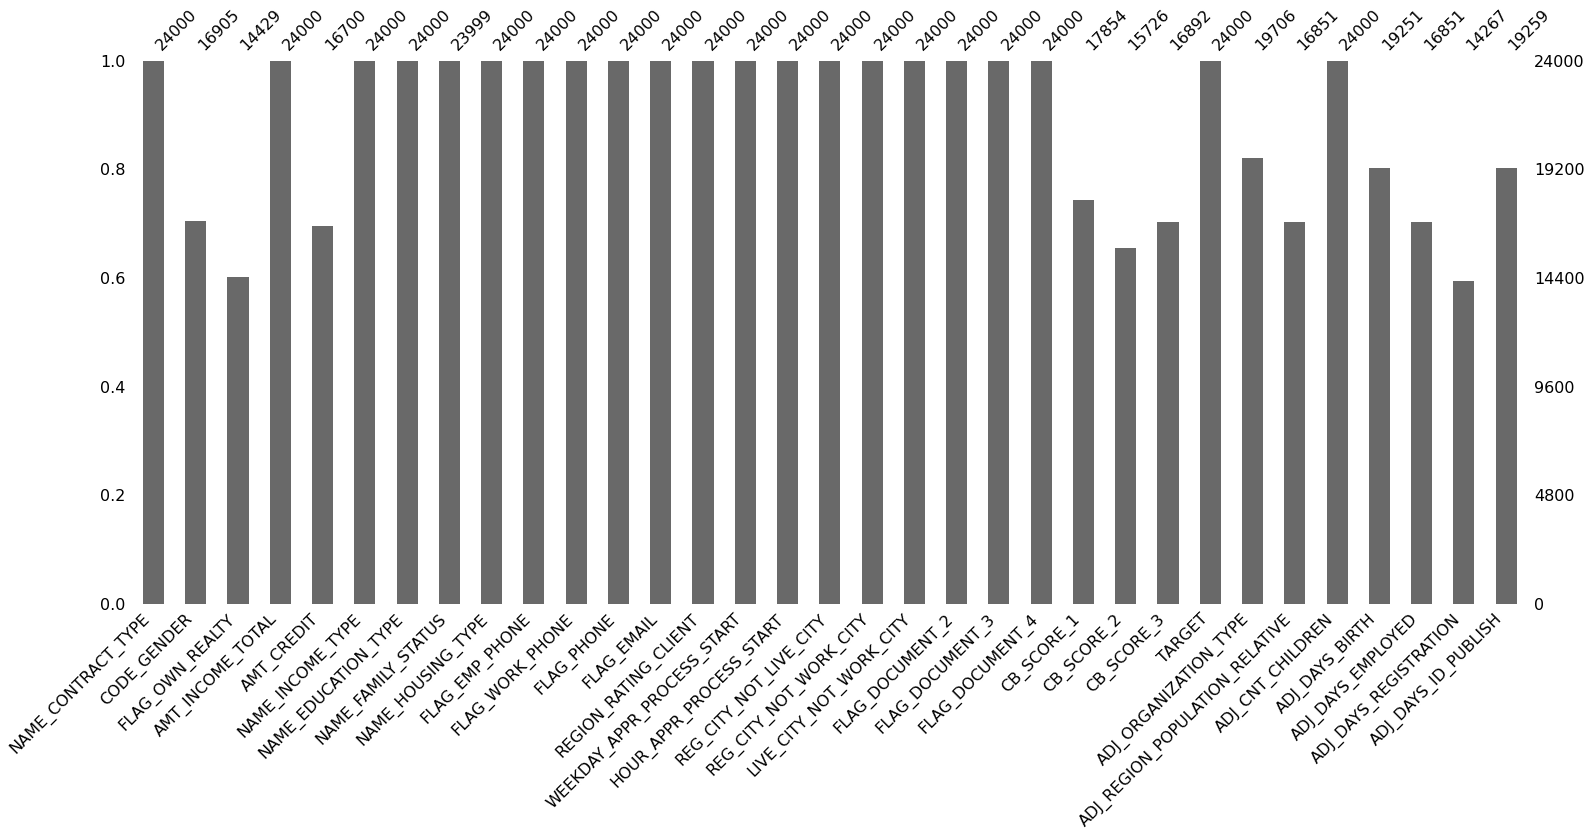

In [116]:
msno.bar(adj_df_v2)

<AxesSubplot:>

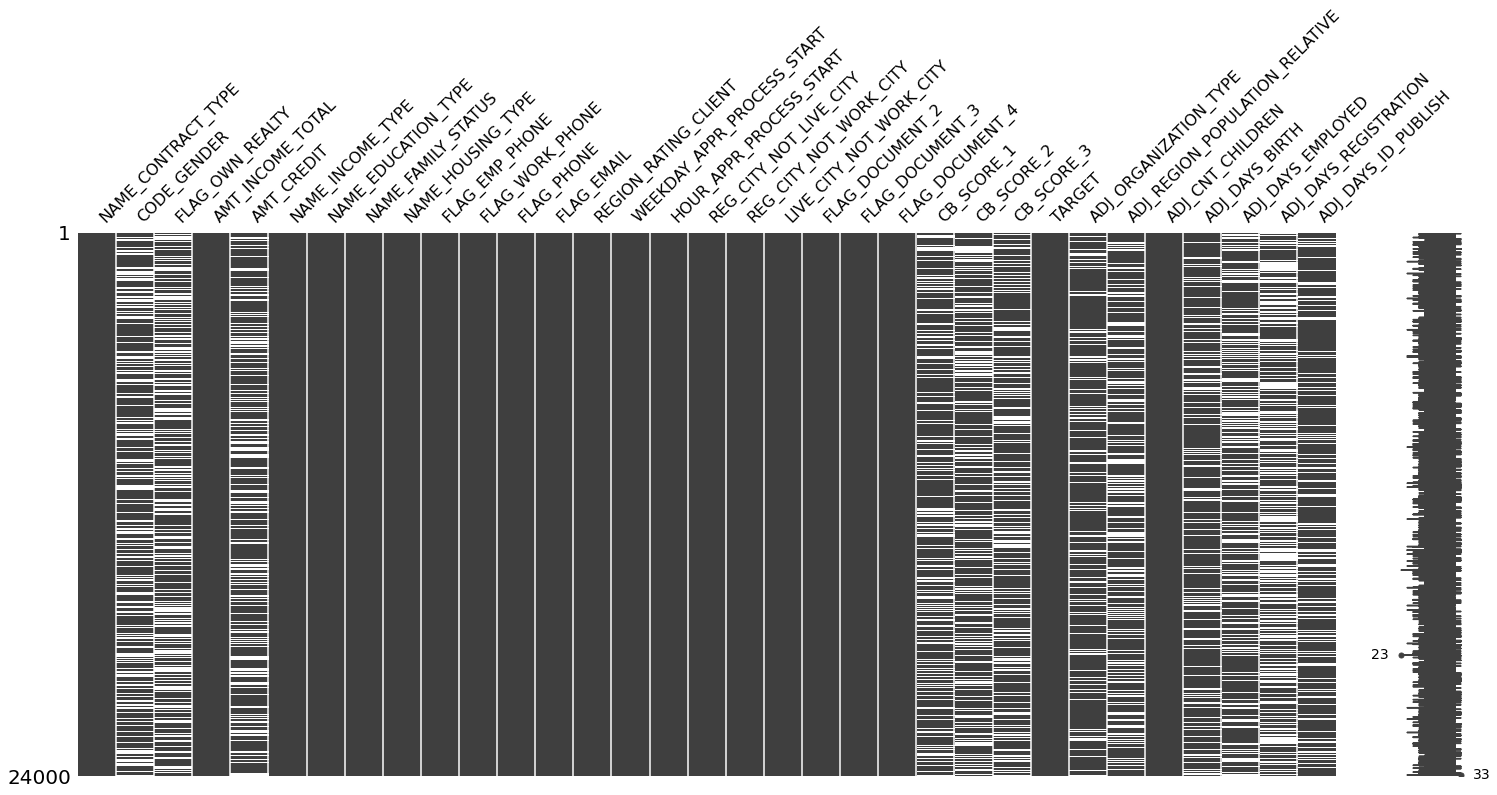

In [117]:
msno.matrix(adj_df_v2)

<AxesSubplot:>

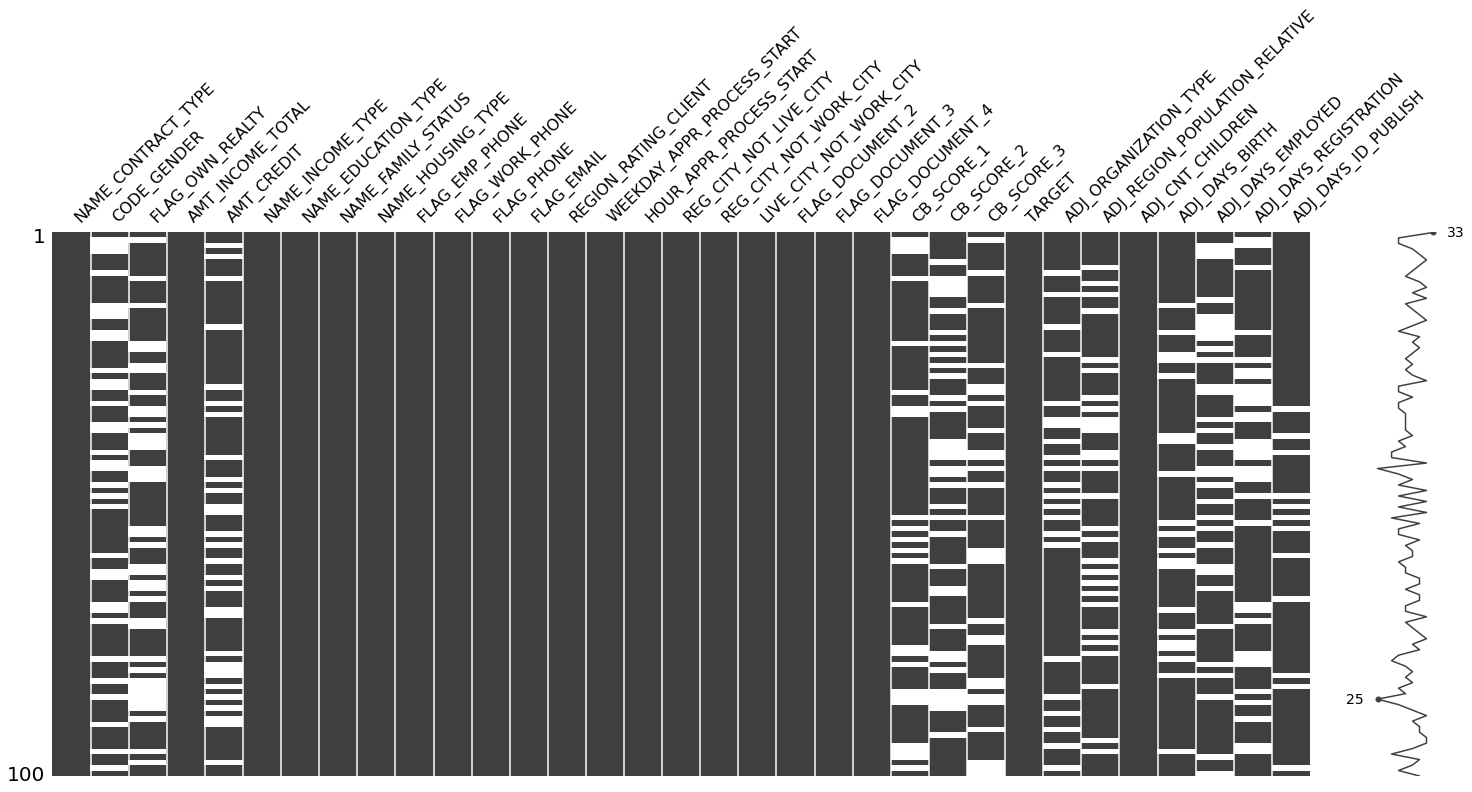

In [118]:
msno.matrix(adj_df_v2.sample(100))

<AxesSubplot:>

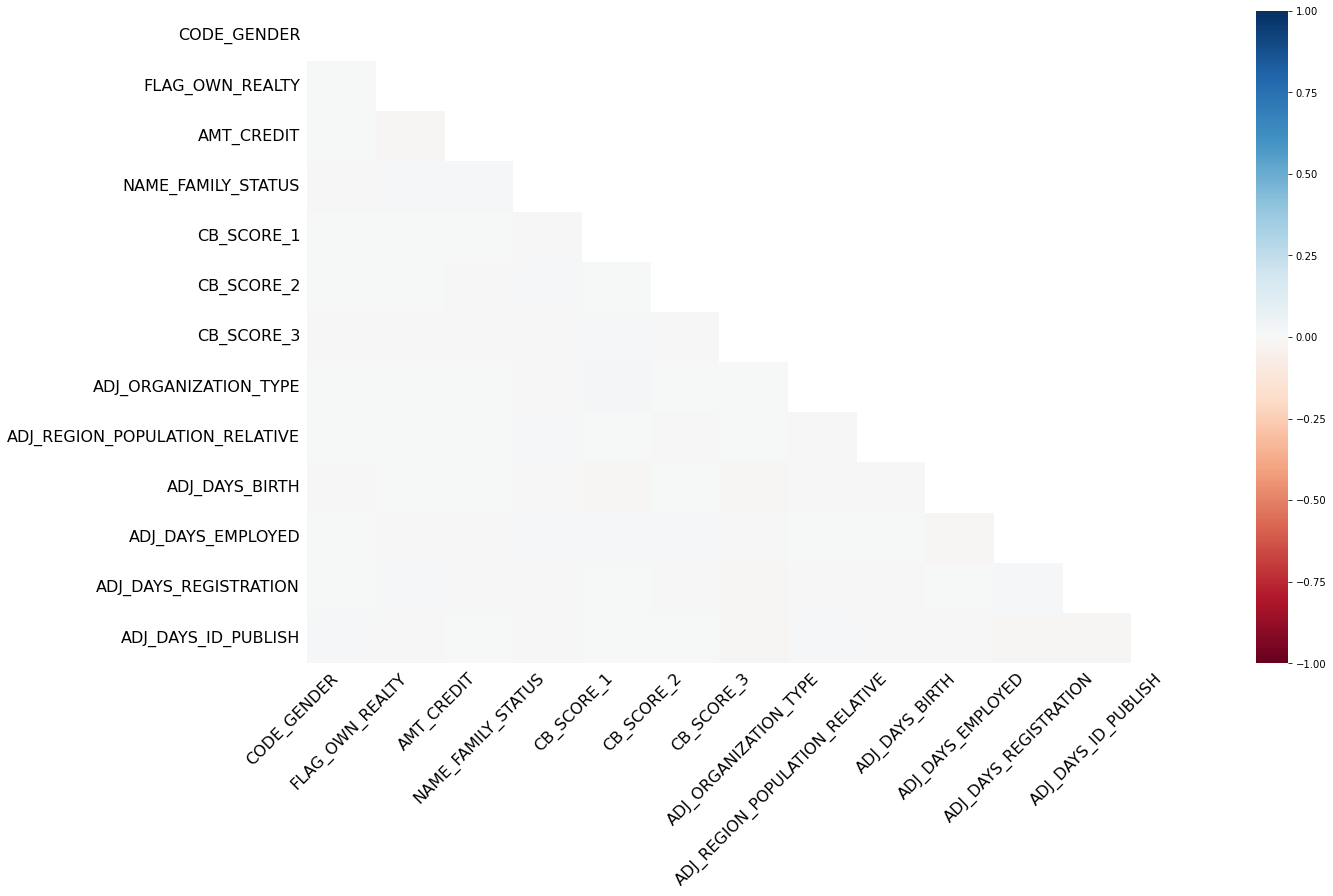

In [119]:
msno.heatmap(adj_df_v2)

<AxesSubplot:>

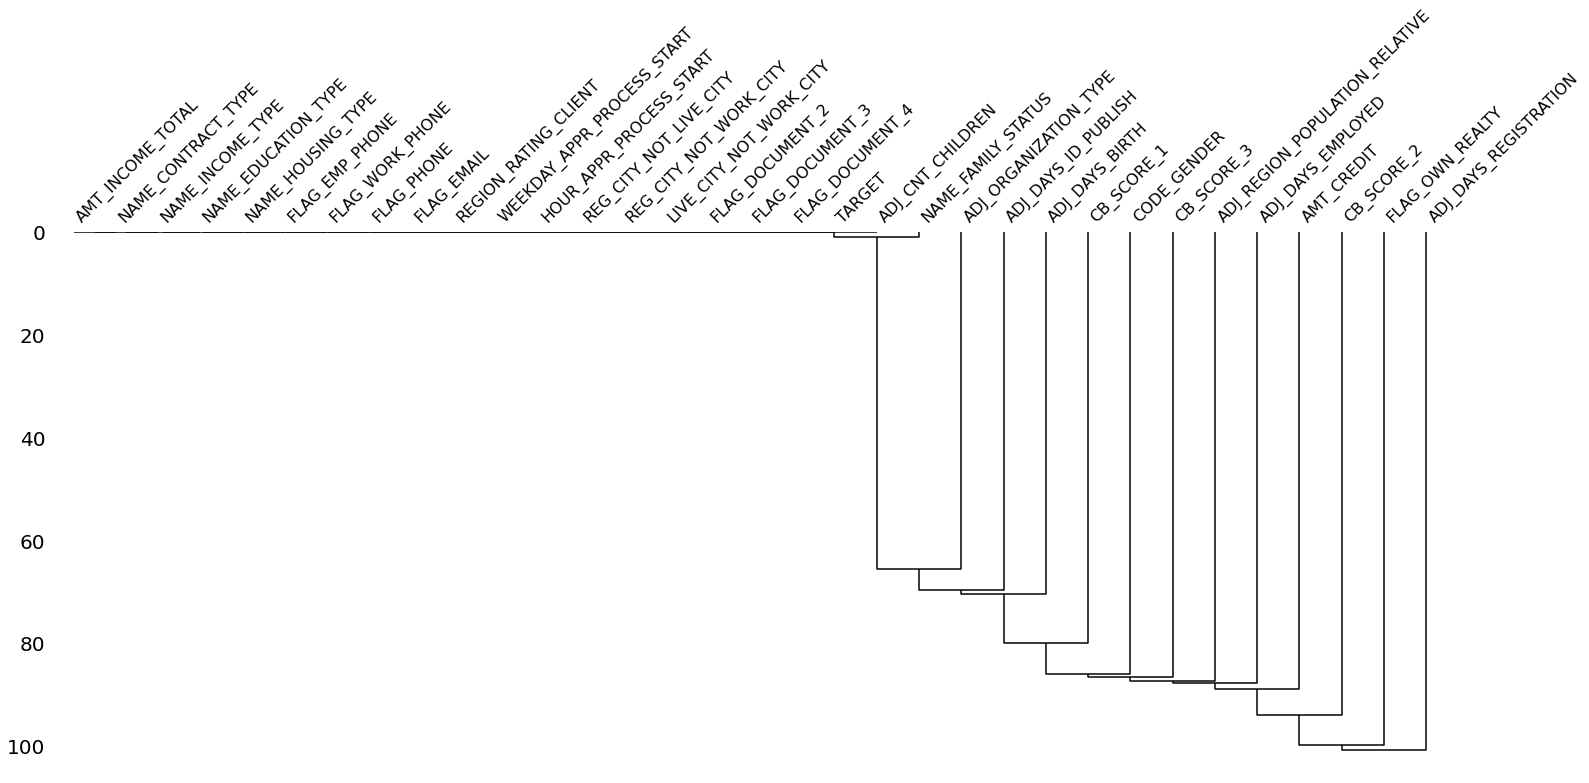

In [120]:
msno.dendrogram(adj_df_v2)

In [128]:
adj_df['CODE_GENDER'].value_counts(dropna = False )

F      11211
NaN     7095
M       5694
Name: CODE_GENDER, dtype: int64

In [ ]:
aj

In [127]:
pd.get_dummies(adj_df['CODE_GENDER'], prefix='CODE_GENDER')

,CODE_GENDER_F,CODE_GENDER_M
0,0,1
1,0,0
2,0,1
3,0,1
4,0,0
...,...,...
23995,0,0
23996,0,0
23997,0,1
23998,0,0


In [106]:
for col in df.columns :
    print(col + ',' + column_info[col] + ':' + str(df[col].isna().sum()))

SK_ID_CURR,대출식별번호:0
NAME_CONTRACT_TYPE,계약유형:0
CODE_GENDER,성별:7094
FLAG_OWN_REALTY,자가부동산보유여부:9571
CNT_CHILDREN,자녀수:0
AMT_INCOME_TOTAL,소득금액(USD):0
AMT_CREDIT,신용대출금액(USD):7300
NAME_INCOME_TYPE,소득유형:0
NAME_EDUCATION_TYPE,학력:0
NAME_FAMILY_STATUS,결혼상태:0
NAME_HOUSING_TYPE,주거형태:0
REGION_POPULATION_RELATIVE,거주지역의표준화된인구:7149
DAYS_BIRTH,대출신청시점에서의일단위나이(기준시점대비상대적인시간):4749
DAYS_EMPLOYED,대출신청시점에서의고객의근무일수(기준시점대비상대적인시간):7149
DAYS_REGISTRATION,대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간):9733
DAYS_ID_PUBLISH,대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간):4741
FLAG_MOBIL,휴대폰번호등록여부:0
FLAG_EMP_PHONE,고용주연락처등록여부:0
FLAG_WORK_PHONE,직장전화번호등록여부:0
FLAG_PHONE,집전화번호등록여부:0
FLAG_EMAIL,이메일주소등록여부:0
REGION_RATING_CLIENT,거주지등급:0
WEEKDAY_APPR_PROCESS_START,대출신청요일:0
HOUR_APPR_PROCESS_START,대출신청시간대:0
REG_CITY_NOT_LIVE_CITY,고객의등록지주소와실거주지일치여부:0
REG_CITY_NOT_WORK_CITY,고객의등록지주소와직장주소일치여부:0
LIVE_CITY_NOT_WORK_CITY,고객의실거주지와직장주소일치여부:0
ORGANIZATION_TYPE,근무회사유형:0
FLAG_DOCUMENT_2,문서2제공여부:0
FLAG_DOCUMENT_3,문서3제공여부:0
FLAG_DOCUMENT_4,문서4제공여부:0
CB_SCO

In [124]:
from impyute.imputation.cs import mice

# start the MICE training
imputed_training=mice(adj_df_v2.values)

BadInputError: Data is not float.

In [79]:
from sklearn.impute import KNNImputer

#임퓨터 선언(5개의 평균으로 계산하겠다)
imputer=KNNImputer(n_neighbors=5)

In [90]:
adj_df_v2[categorical_cols]

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ADJ_ORGANIZATION_TYPE
0,Cash loans,M,Y,Working,Secondary / secondary special,Single / not married,House / apartment,WEDNESDAY,Business and Self-employed
1,Revolving loans,NaN,NaN,Working,Secondary / secondary special,Single / not married,House / apartment,MONDAY,Government and Security
2,Cash loans,M,N,Working,Secondary / secondary special,Married,House / apartment,THURSDAY,Government and Security
3,Cash loans,M,N,Working,Secondary / secondary special,Married,House / apartment,THURSDAY,Business and Self-employed
4,Cash loans,NaN,Y,Working,Secondary / secondary special,Married,House / apartment,MONDAY,Industry and Construction
...,...,...,...,...,...,...,...,...,...
23995,Cash loans,NaN,NaN,Pensioner,Higher education,Married,House / apartment,SUNDAY,NaN
23996,Cash loans,NaN,N,Working,Secondary / secondary special,Married,House / apartment,MONDAY,Business and Self-employed
23997,Cash loans,M,Y,Working,Higher education,Married,House / apartment,FRIDAY,Business and Self-employed
23998,Cash loans,NaN,NaN,Working,Higher education,Single / not married,House / apartment,FRIDAY,Education


In [89]:
adj_df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NAME_CONTRACT_TYPE              24000 non-null  object 
 1   CODE_GENDER                     16905 non-null  object 
 2   FLAG_OWN_REALTY                 14429 non-null  object 
 3   AMT_INCOME_TOTAL                24000 non-null  float64
 4   AMT_CREDIT                      16700 non-null  float64
 5   NAME_INCOME_TYPE                24000 non-null  object 
 6   NAME_EDUCATION_TYPE             24000 non-null  object 
 7   NAME_FAMILY_STATUS              23999 non-null  object 
 8   NAME_HOUSING_TYPE               24000 non-null  object 
 9   FLAG_EMP_PHONE                  24000 non-null  int64  
 10  FLAG_WORK_PHONE                 24000 non-null  int64  
 11  FLAG_PHONE                      24000 non-null  int64  
 12  FLAG_EMAIL                      

In [ ]:

#임퓨터를 사용하여 filled_train으로 저장 이후 같은 임퓨터를 사용할때는 imputer.transform()으로 사용하면됨
filled_train=imputer.fit_transform(adj_df_v2)


In [ ]:

#사용하면 array값으로 나오기때문에 dataframe으로 바꿔주고 컬럼을가져옴
filled_train=pd.DataFrame(filled_train, columns=train.columns)